In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})
import seaborn as sns

# 1.1  Import the monthly and annual data and join

In [2]:
annual_features = pd.read_excel("/content/annual_features.xlsx")
annual_day_of_week_counts_pivot = pd.read_excel("/content/annual_day_of_week_counts_pivot (1).xlsx")
mth_rolling_features = pd.read_excel("/content/mth_rolling_features (1).xlsx")
mth_day_counts = pd.read_excel("/content/mth_day_counts (3) (1).xlsx")
days_since_last_txn = pd.read_excel("/content/days_since_last_txn (1).xlsx")
Retail_Data_Response = pd.read_csv("/content/Retail_Data_Response.csv")

In [3]:
annual_features.set_index("customer_id",inplace=True)

In [4]:
annual_day_of_week_counts_pivot.set_index("customer_id",inplace=True)
mth_rolling_features.set_index("CLNT_NO",inplace=True)
mth_day_counts.set_index("customer_id",inplace=True)
days_since_last_txn.set_index("customer_id",inplace=True)
Retail_Data_Response.set_index("customer_id",inplace=True)

In [5]:
mth_rolling_features.fillna(0,inplace=True)
mth_rolling_features.drop(["Unnamed: 0"],axis=1,inplace=True)
mth_day_counts.fillna(0,inplace=True)
mth_day_counts.drop(["Unnamed: 0"],axis=1,inplace=True)
days_since_last_txn.fillna(0,inplace=True)
days_since_last_txn.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
print(annual_features)
print(annual_day_of_week_counts_pivot)
print(mth_rolling_features)
print(mth_day_counts)
print(days_since_last_txn)
print(Retail_Data_Response)

             sum_2011  sum_2012  sum_2013  ...  count_2013  count_2014  count_2015
customer_id                                ...                                    
CS1112            212       337       212  ...           3           3           1
CS1113            244       374       426  ...           5           4           3
CS1114            426       150       352  ...           5           6           1
CS1115            261       473       557  ...           7           4           1
CS1116            235       230        59  ...           1           5           0
...               ...       ...       ...  ...         ...         ...         ...
CS8996             62       101        83  ...           2           6           0
CS8997             90       158       211  ...           6           2           0
CS8998            128       272        94  ...           2           4           0
CS8999            156       101        84  ...           3           2           0
CS90

In [7]:
mth_rolling_features=mth_rolling_features.pivot(columns="ME_DT")
mth_rolling_features

mth_txn_amt_sum                        ... txn_cnt_max_12M                      
ME_DT        2011-05-31 2011-06-30 2011-07-31  ...      2015-01-31 2015-02-28 2015-03-31
CLNT_NO                                        ...                                      
CS1112                0         56          0  ...             1.0        1.0        1.0
CS1113               94          0         57  ...             1.0        2.0        2.0
CS1114                0          0         77  ...             2.0        2.0        2.0
CS1115                0          0          0  ...             1.0        1.0        1.0
CS1116                0         87         44  ...             1.0        1.0        1.0
...                 ...        ...        ...  ...             ...        ...        ...
CS8996                0          0          0  ...             4.0        4.0        4.0
CS8997                0         47          0  ...             1.0        1.0        1.0
CS8998                0         59          0  ...             1.0        1.0        1.0
CS8999                0          0         31  ...             1.0        1.0        1.0
CS9000                0          0          0  ...             1.0        1.0        1.0

[6889 rows x 940 columns]

In [8]:
mth_day_counts=mth_day_counts.pivot(columns="ME_DT")
mth_day_counts

cnt_Friday                        ... cnt_Wednesday                      
ME_DT       2011-05-31 2011-06-30 2011-07-31  ...    2015-01-31 2015-02-28 2015-03-31
customer_id                                   ...                                    
CS1112               0          0          0  ...             1          0          0
CS1113               1          0          0  ...             1          0          0
CS1114               0          0          0  ...             1          0          0
CS1115               0          0          0  ...             0          0          0
CS1116               0          0          0  ...             0          0          0
...                ...        ...        ...  ...           ...        ...        ...
CS8996               0          0          0  ...             0          0          0
CS8997               0          0          0  ...             0          0          0
CS8998               0          0          0  ...             0          0          0
CS8999               0          0          0  ...             0          0          0
CS9000               0          0          0  ...             0          0          0

[6889 rows x 329 columns]

In [9]:
days_since_last_txn=days_since_last_txn.pivot(columns="ME_DT")
days_since_last_txn

days_since_last_txn             ...                      
ME_DT                2011-05-31 2011-06-30  ... 2015-02-28 2015-03-31
customer_id                                 ...                      
CS1112                      0.0       15.0  ...       45.0       76.0
CS1113                      4.0       34.0  ...       19.0       50.0
CS1114                      0.0        0.0  ...       16.0       47.0
CS1115                      0.0        0.0  ...      255.0       26.0
CS1116                      0.0        3.0  ...      187.0      218.0
...                         ...        ...  ...        ...        ...
CS8996                      0.0        0.0  ...       81.0      112.0
CS8997                      0.0       22.0  ...      245.0      276.0
CS8998                      0.0       22.0  ...       68.0       99.0
CS8999                      0.0        0.0  ...      241.0      272.0
CS9000                      0.0        0.0  ...      188.0       31.0

[6889 rows x 47 columns]

In [10]:
annual_features_joint=annual_features.merge(annual_day_of_week_counts_pivot,how="left",left_index=True,right_index=True)
annual_features_outputs=annual_features_joint.merge(Retail_Data_Response,how="left",left_index=True,right_index=True)

mth_rolling_features_joint=mth_rolling_features.merge(mth_day_counts,how="left",left_index=True,right_index=True)
days_since_last_txn_joint=days_since_last_txn.merge(mth_rolling_features_joint,how="left",left_index=True,right_index=True)
monthly_features_outputs=days_since_last_txn_joint.merge(Retail_Data_Response,how="left",left_index=True,right_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [11]:
annual_features_outputs.dropna(inplace=True)
monthly_features_outputs.dropna(inplace=True)
print(annual_features_outputs)
print(monthly_features_outputs)

             sum_2011  sum_2012  ...  cnt_2015_Wednesday  response
customer_id                      ...                              
CS1112            212       337  ...                   1       0.0
CS1113            244       374  ...                   1       0.0
CS1114            426       150  ...                   0       1.0
CS1115            261       473  ...                   0       1.0
CS1116            235       230  ...                   0       1.0
...               ...       ...  ...                 ...       ...
CS8996             62       101  ...                   0       0.0
CS8997             90       158  ...                   0       0.0
CS8998            128       272  ...                   0       0.0
CS8999            156       101  ...                   0       0.0
CS9000             39       216  ...                   0       0.0

[6884 rows x 76 columns]
             (days_since_last_txn, 2011-05-31 00:00:00)  ...  response
customer_id                     

# 1.2  Steps for each method (10 points)

1.  Separate the inputsXand the outputyin two data frames.

In [12]:
x_annual = annual_features_outputs.drop(["response"],axis=1)
y_annual = annual_features_outputs["response"]
x_monthly = monthly_features_outputs.drop(["response"],axis=1)
y_monthly = monthly_features_outputs["response"]

2.  Split the data in train and test set. Use a testsize value of 2/3 and set the randomstateequal to 1147 for consistency (i.e.  the course code value).  Use the following names forconsistency.

In [13]:
x_train_annual, x_test_annual, y_train_annual, y_test_annual = train_test_split(x_annual, y_annual, test_size=2/3, random_state=1147)
x_train_monthly, x_test_monthly, y_train_monthly, y_test_monthly = train_test_split(x_monthly, y_monthly, test_size=2/3, random_state=1147)

# Logistic Regression with L1 regularization

3.  Pre-process (if necessary for the method).

In [14]:
scaler_annual = StandardScaler()
scaler_monthly = StandardScaler()
x_train_annual_scaled=scaler_annual.fit_transform(x_train_annual)
x_train_monthly_scaled=scaler_monthly.fit_transform(x_train_monthly)
x_test_annual_scaled = scaler_annual.transform(x_test_annual)
x_test_monthly_scaled = scaler_monthly.transform(x_test_monthly)

4.  Fit the training dataset and optimize the hyperparameters of the method.

search best hyperparameter of L1 penalty for monthly features

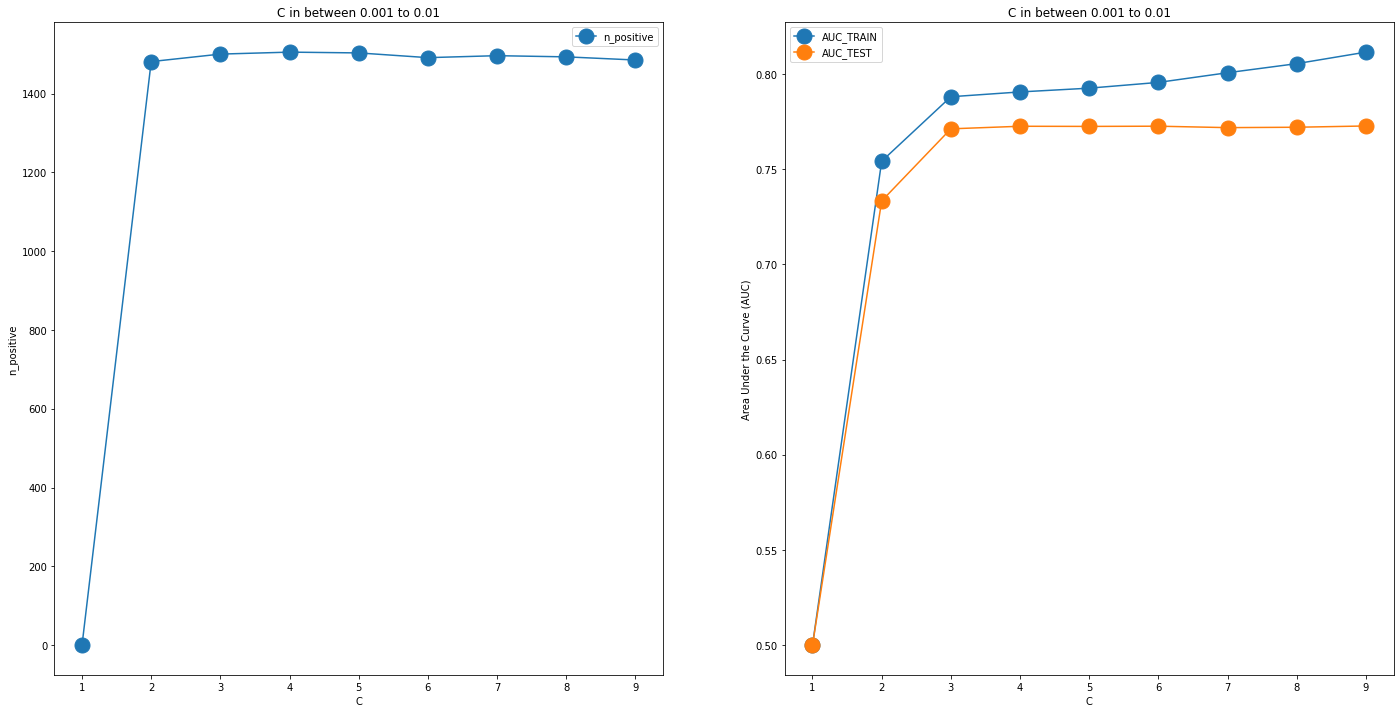

In [22]:
from sklearn.metrics import roc_curve, auc
C = range(1, 10)
LogReg_monthly = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_monthly.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/1000,class_weight="balanced"))
    LogReg_monthly[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_monthly[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = LogReg_monthly[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_monthly[i-1].predict(x_train_monthly_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_monthly[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.001 to 0.01")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.001 to 0.01")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()    

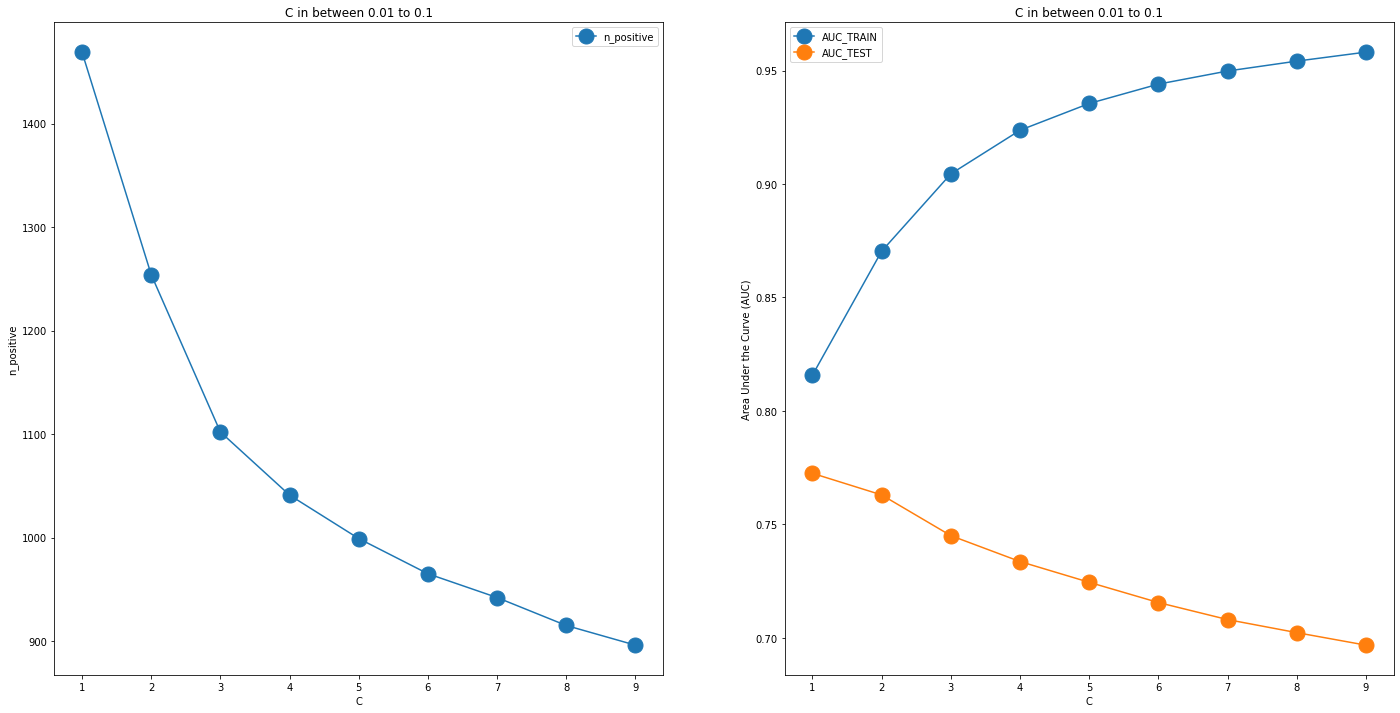

In [23]:
C = range(1, 10)
LogReg_monthly = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_monthly.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/100,class_weight="balanced"))
    LogReg_monthly[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_monthly[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = LogReg_monthly[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_monthly[i-1].predict(x_train_monthly_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_monthly[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.01 to 0.1")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.01 to 0.1")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

comparation of class_weight = None

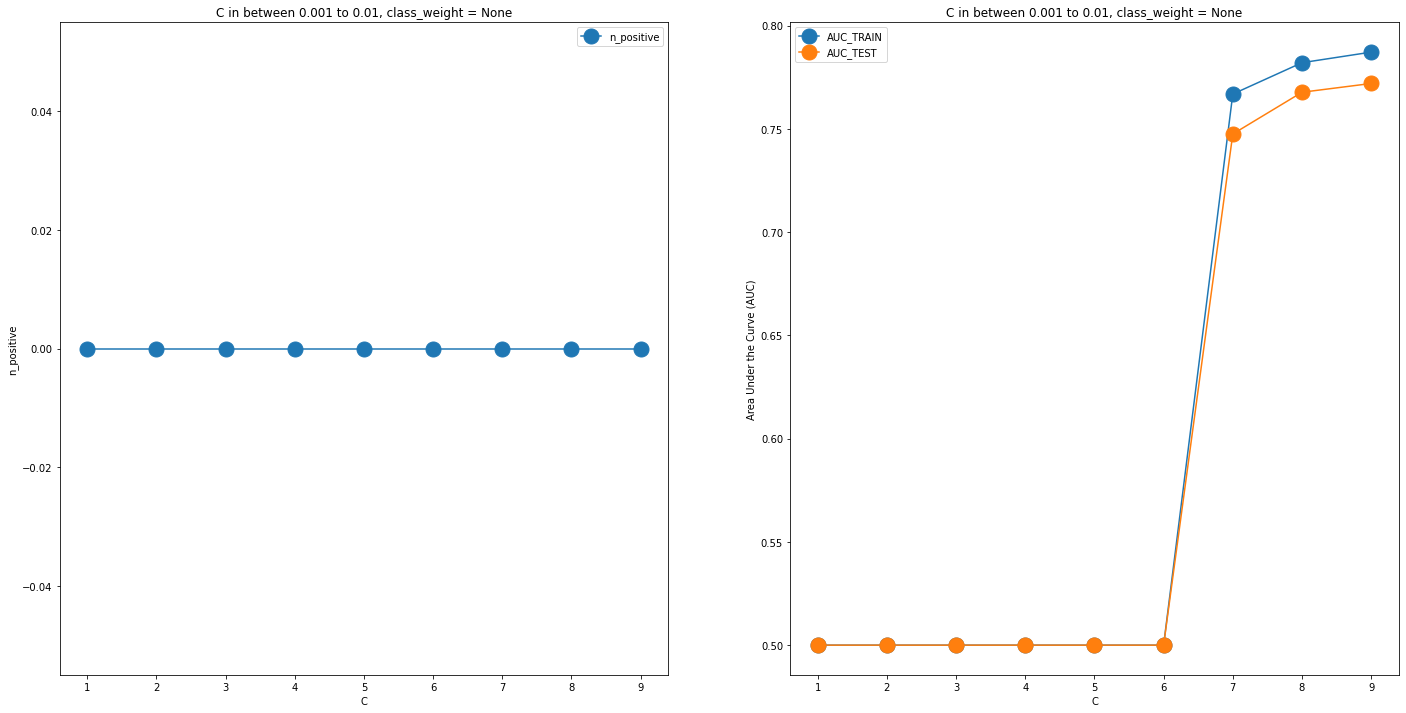

In [24]:
# class_weight = None
C = range(1, 10)
LogReg_monthly = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_monthly.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/1000))
    LogReg_monthly[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_monthly[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = LogReg_monthly[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_monthly[i-1].predict(x_train_monthly_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_monthly[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.001 to 0.01, class_weight = None")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.001 to 0.01, class_weight = None")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


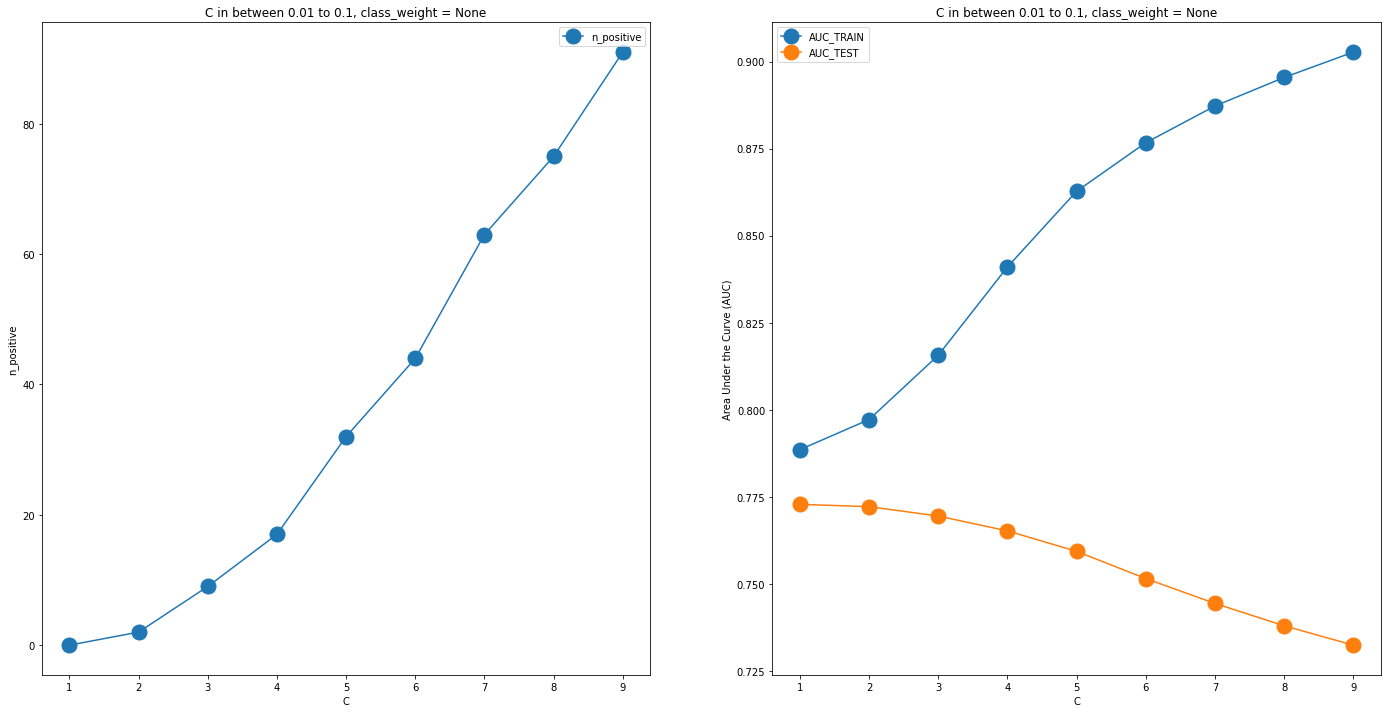

In [26]:
# class_weight = None
C = range(1, 10)
LogReg_monthly = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_monthly.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/100))
    LogReg_monthly[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_monthly[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = LogReg_monthly[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_monthly[i-1].predict(x_train_monthly_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_monthly[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.01 to 0.1, class_weight = None")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.01 to 0.1, class_weight = None")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

search best hyperparameter of L1 penalty for annual features

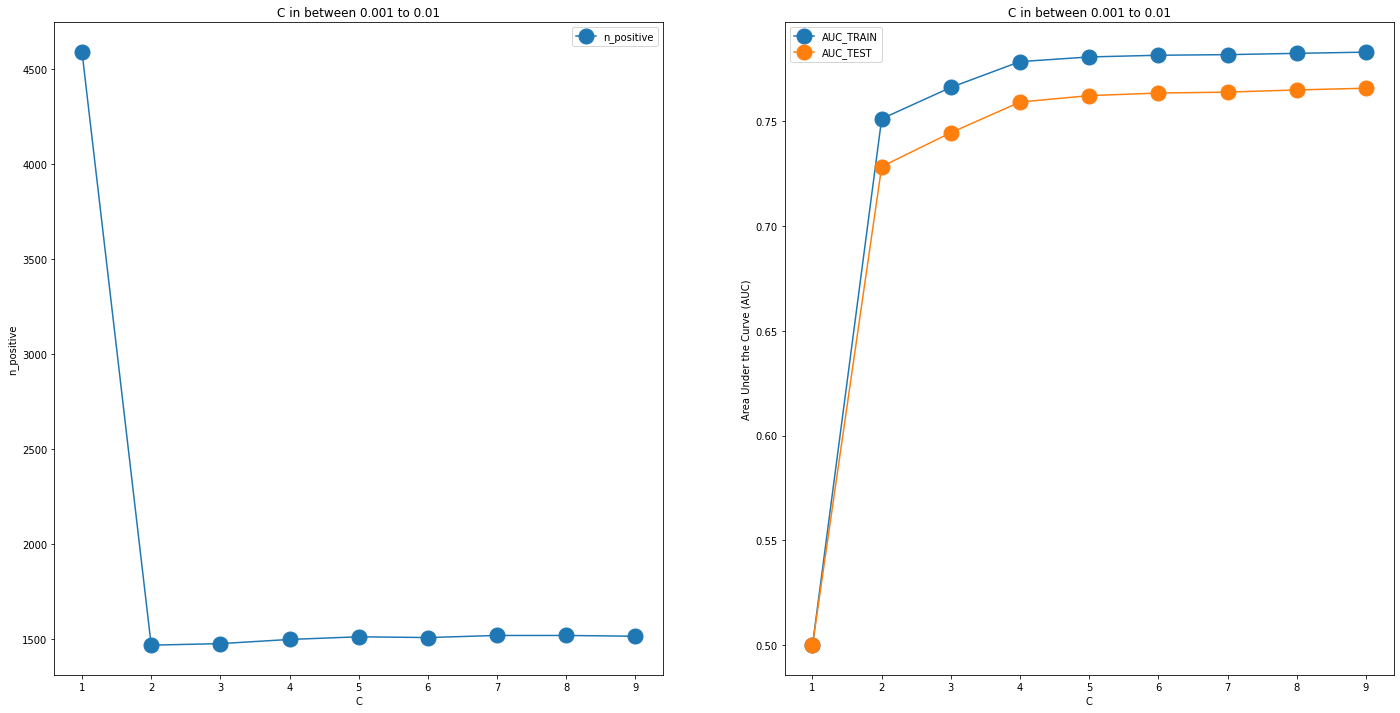

In [29]:
C = range(1, 10)
LogReg_annual = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_annual.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/1000,class_weight="balanced"))
    LogReg_annual[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_annual[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = LogReg_annual[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_annual[i-1].predict(x_train_annual_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_annual[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.001 to 0.01")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.001 to 0.01")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

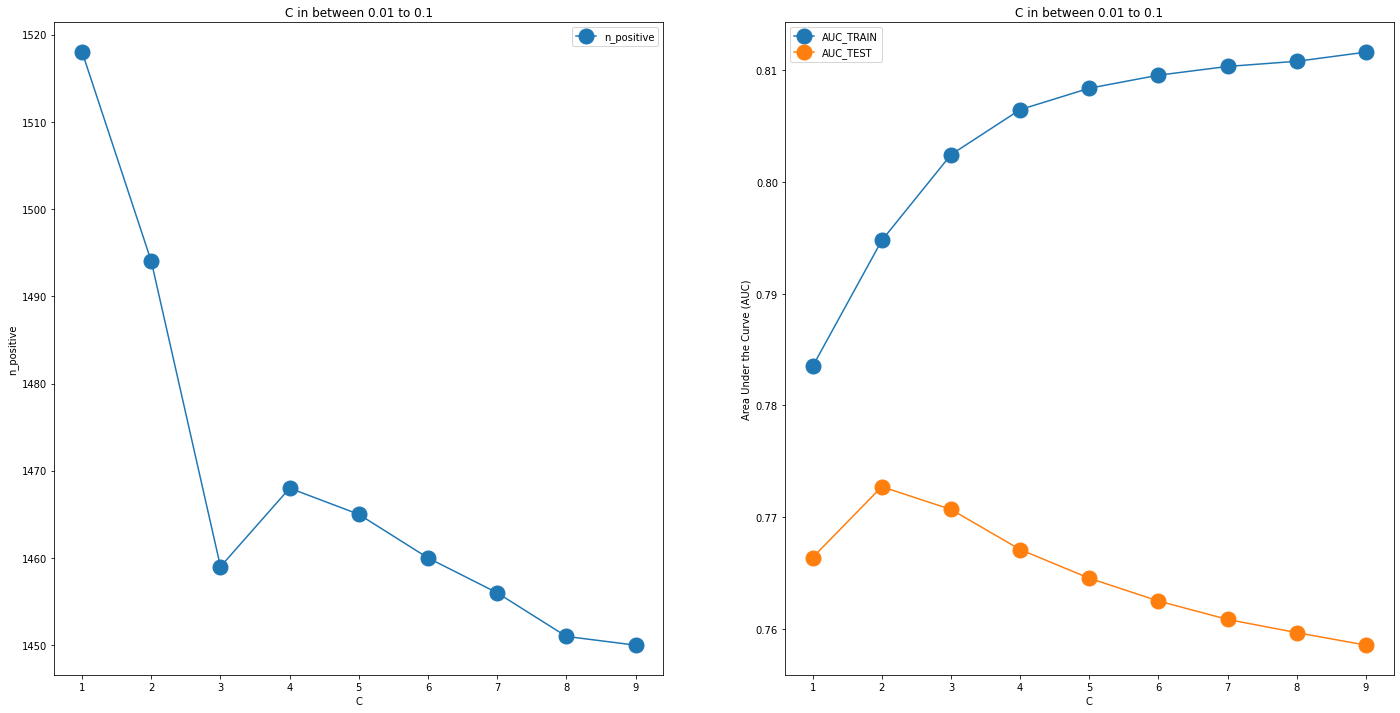

In [31]:
C = range(1, 10)
LogReg_annual = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_annual.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/100,class_weight="balanced"))
    LogReg_annual[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_annual[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = LogReg_annual[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_annual[i-1].predict(x_train_annual_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_annual[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.01 to 0.1")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.01 to 0.1")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

comparation of class_weight = None

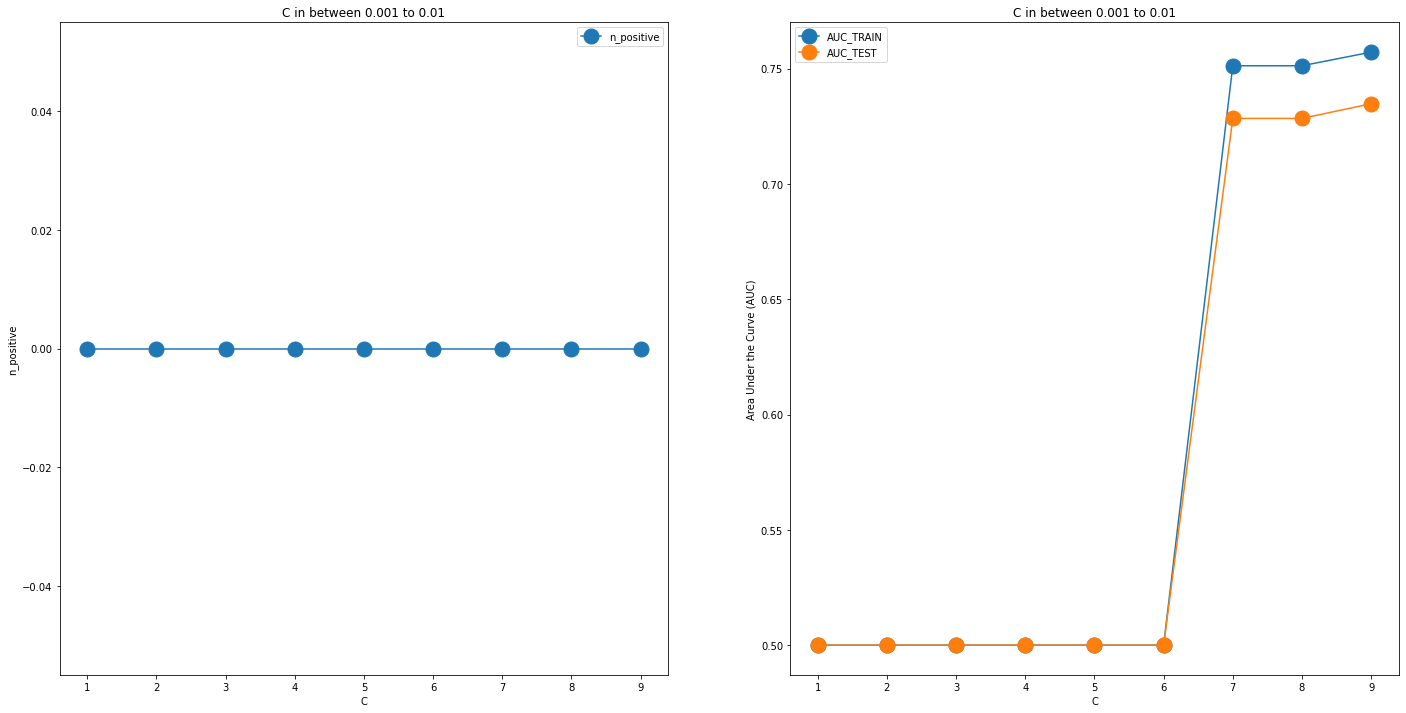

In [32]:
C = range(1, 10)
LogReg_annual = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_annual.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/1000))
    LogReg_annual[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_annual[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = LogReg_annual[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_annual[i-1].predict(x_train_annual_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_annual[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.001 to 0.01")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.001 to 0.01")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

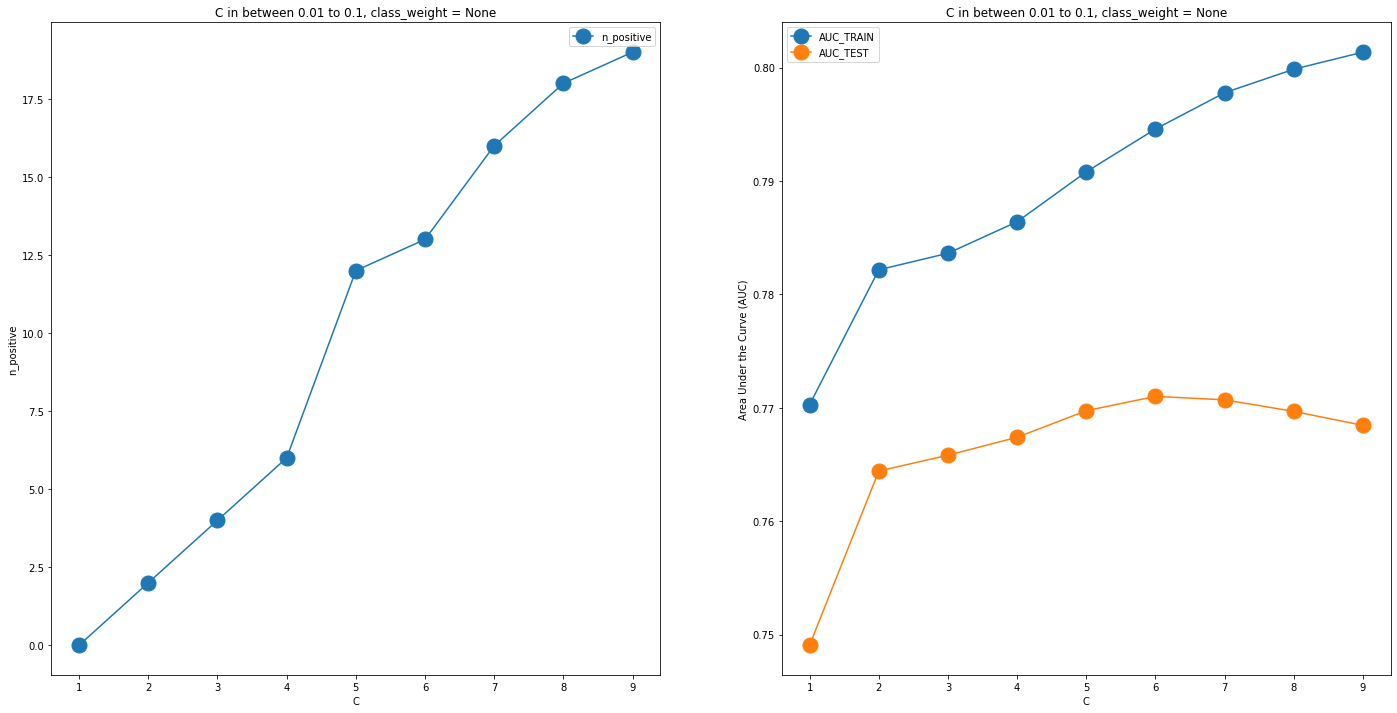

In [33]:
C = range(1, 10)
LogReg_annual = []
n_positive = []
auc_train           = []
auc_test            = []

for i in C:
    # Define and fit
    LogReg_annual.append(LogisticRegression(random_state=0,penalty="l1",solver="saga",max_iter=2000,C=i/100))
    LogReg_annual[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = LogReg_annual[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = LogReg_annual[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = LogReg_annual[i-1].predict(x_train_annual_scaled)
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(LogReg_annual[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'C', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("C")
plt.title("C in between 0.01 to 0.1, class_weight = None")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'C', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("C")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("C in between 0.01 to 0.1, class_weight = None")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

In [390]:
LogReg_annual = LogisticRegression(penalty="l1",solver="saga",max_iter=500,C=0.02,class_weight="balanced") #C was selected through grid seach. class_weight set to be "balanced" due to the unbalanced dataset (1:9), otherwise very few positive would be predicted because of the majority advantage.
LogReg_annual.fit(x_train_annual_scaled, y_train_annual)

LogisticRegression(C=0.02, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [391]:
LogReg_annual.score(x_train_annual_scaled,y_train_annual)

0.7201394943330427

In [392]:
LogReg_annual.score(x_test_annual_scaled,y_test_annual)
# since the purpose is the project is to predict the clients who are willing to participate the campaign. More TP and better recall would have higher priorities because we don't want to lose any potential clients.

0.711764705882353

In [393]:
LogReg_monthly = LogisticRegression(penalty="l1",solver="saga",max_iter=2000,C=0.003,class_weight="balanced")
LogReg_monthly.fit(x_train_monthly_scaled, y_train_monthly)

LogisticRegression(C=0.003, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [394]:
LogReg_monthly.score(x_test_monthly_scaled,y_test_monthly)

0.7143790849673203

5.  Plot coefficient values or feature importance.

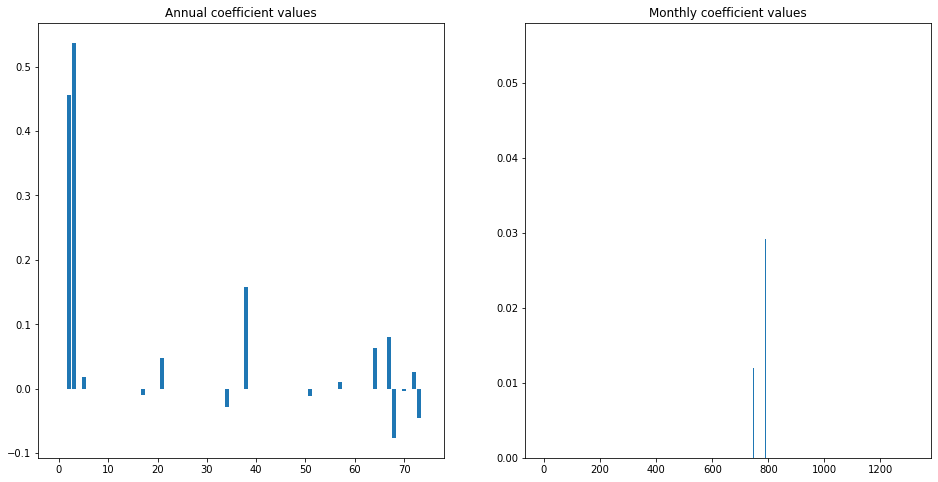

In [395]:
coef_annual=LogReg_annual.coef_
coef_monthly=LogReg_monthly.coef_
matplotlib.rcParams['figure.figsize'] = (16, 8)

plt.subplot(121)
plt.bar(range(x_annual.shape[1]), coef_annual[0])
plt.title("Annual coefficient values")
plt.subplot(122)
plt.bar(range(x_monthly.shape[1]), coef_monthly[0])
plt.title("Monthly coefficient values")
plt.show()

6.  Plot probability distribution for test set.

In [397]:

y_test_annual_proba = LogReg_annual.predict_proba(x_test_annual_scaled)
y_test_monthly_proba = LogReg_monthly.predict_proba(x_test_monthly_scaled)

[22.17910934 42.35543423 54.90921254 ... 35.62129226 19.60050888
 93.30889309]
[[0.60205264 0.39794736]
 [0.51270901 0.48729099]
 [0.49288878 0.50711122]
 ...
 [0.56383974 0.43616026]
 [0.64042693 0.35957307]
 [0.27408509 0.72591491]]


Text(3.674999999999997, 0.5, 'Counts of clients')

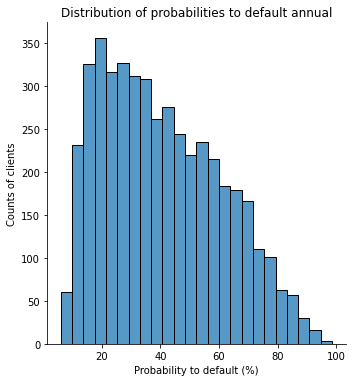

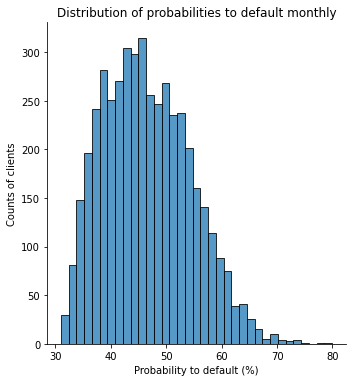

In [398]:
print(100*y_test_annual_proba[:,1])
print(y_test_monthly_proba)

sns.displot(data = y_test_annual_proba[:,1], x = 100*y_test_annual_proba[:,1])
plt.title('Distribution of probabilities to default annual')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

sns.displot(data = y_test_monthly_proba[:,1], x = 100*y_test_monthly_proba[:,1])
plt.title('Distribution of probabilities to default monthly')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

7.  Plot confusion matrix and ROC curves of train/test set.  Calculate precision/recall.

In [399]:
from sklearn.metrics import confusion_matrix
y_test_annual_predicted = LogReg_annual.predict(x_test_annual_scaled)
y_test_monthly_predicted = LogReg_monthly.predict(x_test_monthly_scaled)
cm_annual = confusion_matrix(y_test_annual.values, y_test_annual_predicted)
cm_monthly = confusion_matrix(y_test_monthly.values, y_test_monthly_predicted)
print(cm_annual,cm_monthly)

[[2956 1183]
 [ 140  311]] [[2959 1180]
 [ 131  320]]


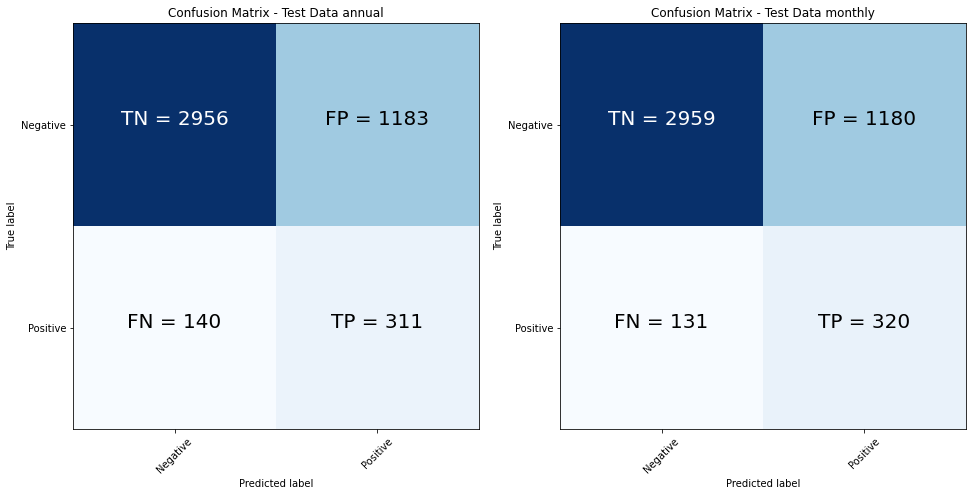

In [400]:
plt.clf()
plt.subplot(121)
plt.imshow(cm_annual, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data annual')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_annual.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_annual[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_annual[i, j] > thresh else "black")
plt.subplot(122)
plt.imshow(cm_monthly, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data monthly')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_monthly.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_monthly[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_monthly[i, j] > thresh else "black")
plt.show()

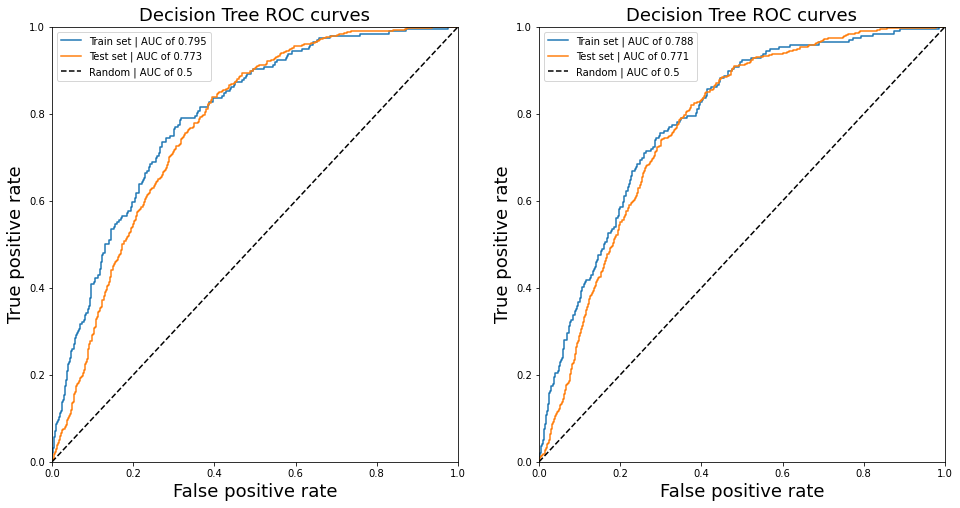

In [401]:

y_train_annual_proba = LogReg_annual.predict_proba(x_train_annual_scaled)
y_train_monthly_proba = LogReg_monthly.predict_proba(x_train_monthly_scaled)
fpr_train_annual, tpr_train_annual, _ = roc_curve(y_train_annual, y_train_annual_proba[:, 1])
fpr_test_annual, tpr_test_annual, _ = roc_curve(y_test_annual, y_test_annual_proba[:, 1])
fpr_train_monthly, tpr_train_monthly, _ = roc_curve(y_train_monthly, y_train_monthly_proba[:, 1])
fpr_test_monthly, tpr_test_monthly, _ = roc_curve(y_test_monthly, y_test_monthly_proba[:, 1])
auc_train_annual = auc(fpr_train_annual, tpr_train_annual)
auc_test_annual = auc(fpr_test_annual, tpr_test_annual)
auc_train_monthly = auc(fpr_train_monthly, tpr_train_monthly)
auc_test_monthly  = auc(fpr_test_monthly, tpr_test_monthly)
plt.subplot(121)
plt.plot(fpr_train_annual, tpr_train_annual, label='Train set | AUC of {:4.3f}'.format(auc_train_annual));
plt.plot(fpr_test_annual, tpr_test_annual, label='Test set | AUC of {:4.3f}'.format(auc_test_annual));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.subplot(122)
plt.plot(fpr_train_monthly, tpr_train_monthly, label='Train set | AUC of {:4.3f}'.format(auc_train_monthly));
plt.plot(fpr_test_monthly, tpr_test_monthly, label='Test set | AUC of {:4.3f}'.format(auc_test_monthly));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()

In [402]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_annual, y_test_annual_predicted, target_names = ['responed negative', 'responed positive']))

                   precision    recall  f1-score   support

responed negative       0.95      0.71      0.82      4139
responed positive       0.21      0.69      0.32       451

         accuracy                           0.71      4590
        macro avg       0.58      0.70      0.57      4590
     weighted avg       0.88      0.71      0.77      4590



In [403]:
print(classification_report(y_test_monthly, y_test_monthly_predicted, target_names = ['responed negative', 'responed positive']))

                   precision    recall  f1-score   support

responed negative       0.96      0.71      0.82      4139
responed positive       0.21      0.71      0.33       451

         accuracy                           0.71      4590
        macro avg       0.59      0.71      0.57      4590
     weighted avg       0.88      0.71      0.77      4590



8.  Plot decision boundary for top 2 features.

In [48]:
top_feature_annual = pd.DataFrame(coef_annual.reshape((75,)))
print(top_feature_annual.sort_values(by=0))
top_feature_monthly = pd.DataFrame(coef_monthly.reshape((1316,)))
print(top_feature_monthly.sort_values(by=0))

           0
68 -0.076442
73 -0.045626
34 -0.028591
51 -0.011549
17 -0.009904
..       ...
64  0.062829
67  0.080188
38  0.157813
2   0.456128
3   0.537254

[75 rows x 1 columns]
            0
0    0.000000
884  0.000000
883  0.000000
882  0.000000
881  0.000000
..        ...
749  0.043538
748  0.050791
795  0.050791
786  0.055184
739  0.055184

[1316 rows x 1 columns]


In [63]:
print(x_train_annual.columns[2],x_train_annual.columns[3])
print(x_train_monthly.columns[786],x_train_monthly.columns[795])

sum_2013 sum_2014
('amt_mean_12M', Timestamp('2014-03-31 00:00:00')) ('amt_mean_12M', Timestamp('2014-12-31 00:00:00'))


In [62]:
print(x_train_annual_scaled.max(axis=0)[2])
print(x_train_annual_scaled.max(axis=0)[3])
print(x_train_annual_scaled.min(axis=0)[2])
print(x_train_annual_scaled.min(axis=0)[3])
print(x_train_monthly_scaled.max(axis=0)[786])
print(x_train_monthly_scaled.max(axis=0)[795])
print(x_train_monthly_scaled.min(axis=0)[786])
print(x_train_monthly_scaled.min(axis=0)[795])

5.53912436943854
3.824668181429266
-1.6977424959358869
-1.755266718463368
5.921435653486067
3.835520008408809
-1.7092324501677092
-1.7596660897424585


In [54]:
xx_annual, yy_annual = np.mgrid[-2:6:0.888, -2:4:0.666]
grid_annual = np.c_[xx_annual.ravel(), yy_annual.ravel()]
grid_annual.shape

(100, 2)

In [55]:
median_inputs_annual = np.ones((100, 75)) * np.median(x_train_annual_scaled, axis=0) 
median_inputs_annual[:,2] = grid_annual[:,0]
median_inputs_annual[:,3] = grid_annual[:,1]
median_inputs_annual

array([[-0.15111187, -0.11240528, -2.        , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -2.        , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -2.        , ..., -0.37462899,
        -0.38350696, -0.37195027],
       ...,
       [-0.15111187, -0.11240528,  5.992     , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528,  5.992     , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528,  5.992     , ..., -0.37462899,
        -0.38350696, -0.37195027]])

In [56]:
probs_annual = LogReg_annual.predict_proba(median_inputs_annual)[:, 1].reshape(xx_annual.shape)
np.sum(LogReg_annual.predict(median_inputs_annual))


72.0

[(-2.0, 4.0),
 Text(0, 0.5, 'sum_2014 scaled'),
 (-2.0, 6.0),
 Text(0.5, 0, 'sum_2013 scaled'),
 None]

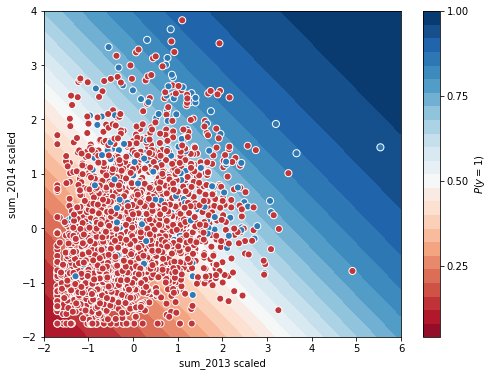

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx_annual, yy_annual, probs_annual, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(x_train_annual_scaled[:,2], x_train_annual_scaled[:, 3], c=y_train_annual, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 6), ylim=(-2, 4),
       xlabel="sum_2013 scaled", ylabel="sum_2014 scaled")

In [64]:
xx_monthly, yy_monthly = np.mgrid[-2:6:0.888, -2:4:0.666]
grid_monthly = np.c_[xx_monthly.ravel(), yy_monthly.ravel()]
grid_monthly.shape

(100, 2)

In [66]:
median_inputs_monthly = np.ones((100, 1316)) * np.median(x_train_monthly_scaled, axis=0) 
median_inputs_monthly[:,786] = grid_monthly[:,0]
median_inputs_monthly[:,795] = grid_monthly[:,1]
median_inputs_monthly

array([[-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       ...,
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119]])

In [67]:
probs_monthly = LogReg_monthly.predict_proba(median_inputs_monthly)[:, 1].reshape(xx_monthly.shape)
np.sum(LogReg_monthly.predict(median_inputs_monthly))

47.0

[(-2.0, 4.0),
 Text(0, 0.5, "('amt_mean_12M', Timestamp('2014-12-31 00:00:00')) scaled"),
 (-2.0, 6.0),
 Text(0.5, 0, "('amt_mean_12M', Timestamp('2014-03-31 00:00:00'))"),
 None]

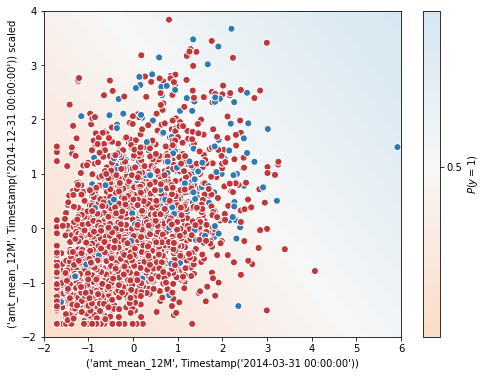

In [69]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx_monthly, yy_monthly, probs_monthly, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(x_train_monthly_scaled[:,786], x_train_monthly_scaled[:, 795], c=y_train_monthly, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 6), ylim=(-2, 4),
       xlabel="('amt_mean_12M', Timestamp('2014-03-31 00:00:00'))", ylabel="('amt_mean_12M', Timestamp('2014-12-31 00:00:00')) scaled")

# Decision Tree

4.  Fit the training dataset and optimize the hyperparameters of the method.

search for best max_depth for monthly features

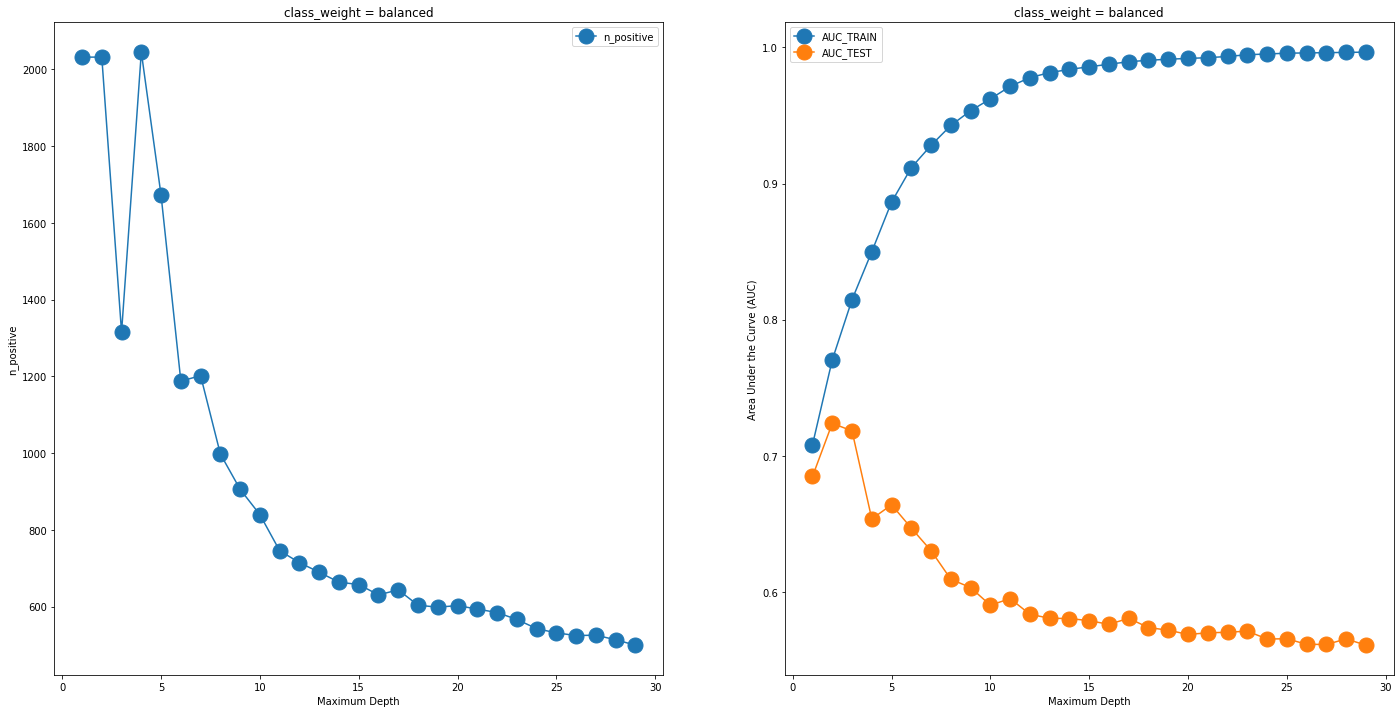

In [83]:
max_depth_range = range(1, 30)
estimator_max_depth = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=1, max_depth = i,class_weight="balanced"))
    estimator_max_depth[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(x_test_monthly_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_depth[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("Maximum Depth")
plt.title("class_weight = balanced")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("class_weight = balanced")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()    

comparation of class_weight = None

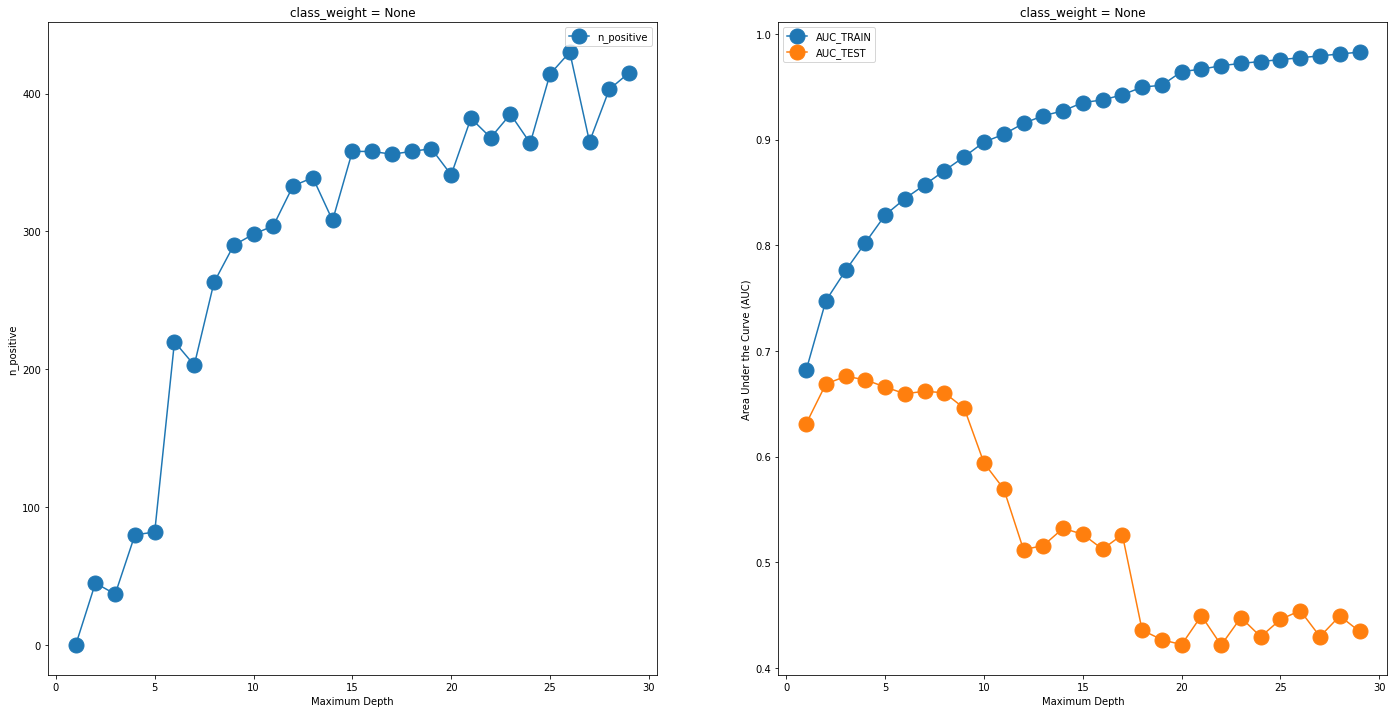

In [73]:
max_depth_range = range(1, 30)
estimator_max_depth = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=1, max_depth = i))
    estimator_max_depth[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(x_test_monthly_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_depth[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("Maximum Depth")
plt.title("class_weight = None")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("class_weight = None")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

search for best max_depth for annual features

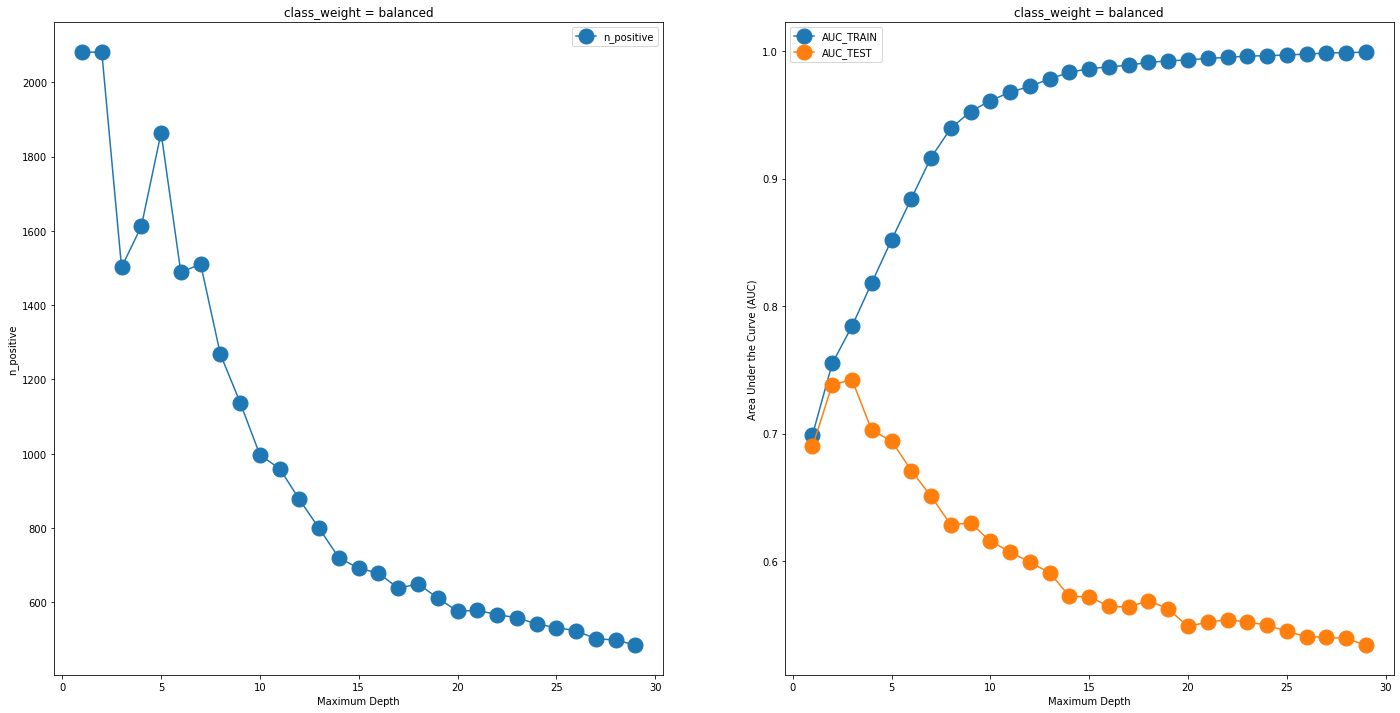

In [108]:
max_depth_range = range(1, 30)
estimator_max_depth = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=1, max_depth = i,class_weight="balanced"))
    estimator_max_depth[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(x_test_annual_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_depth[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("Maximum Depth")
plt.title("class_weight = balanced")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("class_weight = balanced")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

comparation of class_weight = None

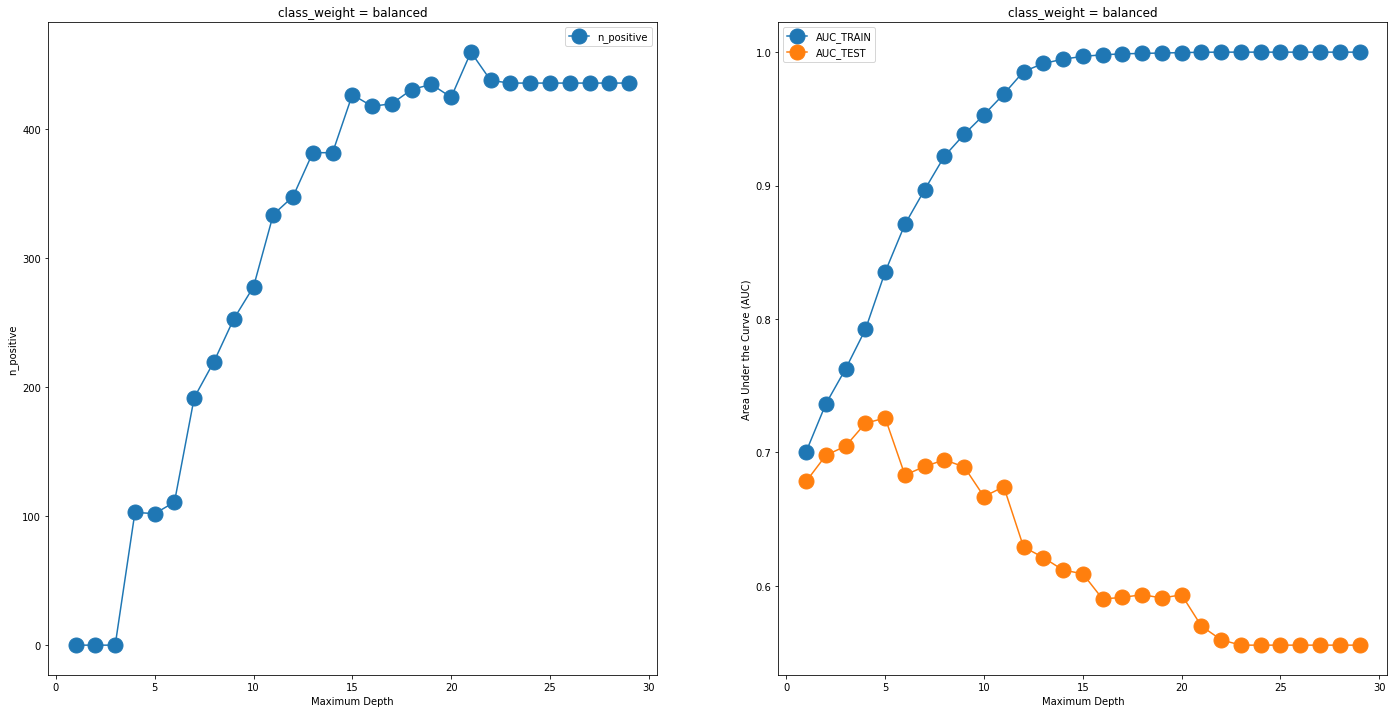

In [109]:
max_depth_range = range(1, 30)
estimator_max_depth = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=1, max_depth = i))
    estimator_max_depth[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(x_test_annual_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_depth[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("Maximum Depth")
plt.title("class_weight = balanced")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("class_weight = balanced")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()  

In [75]:
decisiontree_annual = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
decisiontree_annual.fit(x_train_annual_scaled, y_train_annual)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
decisiontree_annual.score(x_test_annual_scaled,y_test_annual)

0.703921568627451

[Text(446.4, 380.52, 'X[3] <= 0.006\ngini = 0.5\nsamples = 2294\nvalue = [1147.0, 1147.0]'),
 Text(223.2, 271.8, 'X[2] <= 0.157\ngini = 0.365\nsamples = 1256\nvalue = [666.988, 210.673]'),
 Text(111.6, 163.07999999999998, 'X[4] <= -0.699\ngini = 0.196\nsamples = 876\nvalue = [473.452, 58.52]'),
 Text(55.8, 54.360000000000014, 'gini = 0.331\nsamples = 373\nvalue = [199.003, 52.668]'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.041\nsamples = 503\nvalue = [274.449, 5.852]'),
 Text(334.79999999999995, 163.07999999999998, 'X[38] <= -0.094\ngini = 0.493\nsamples = 380\nvalue = [193.536, 152.153]'),
 Text(279.0, 54.360000000000014, 'gini = 0.468\nsamples = 342\nvalue = [177.134, 105.337]'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.384\nsamples = 38\nvalue = [16.401, 46.816]'),
 Text(669.5999999999999, 271.8, 'X[2] <= 0.195\ngini = 0.448\nsamples = 1038\nvalue = [480.012, 936.327]'),
 Text(558.0, 163.07999999999998, 'X[38] <= 0.791\ngini = 0.494\nsamples = 527\nval

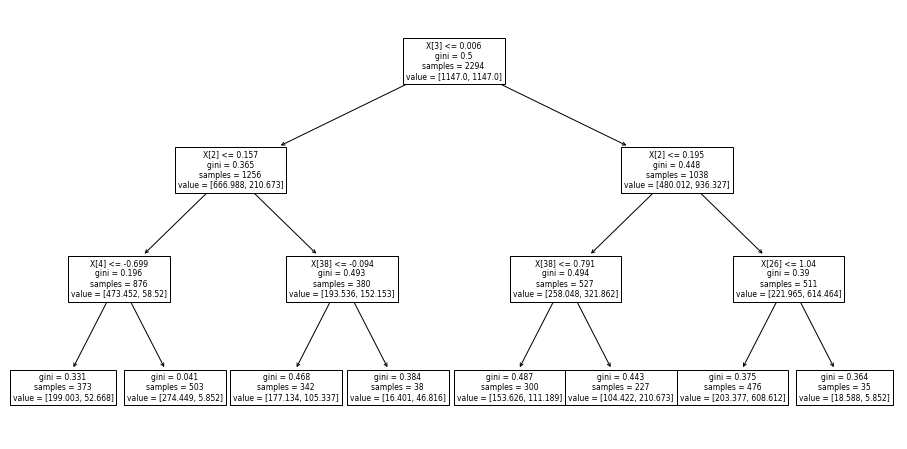

In [80]:
plot_tree(decisiontree_annual)

In [77]:
decisiontree_monthly = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
decisiontree_monthly.fit(x_train_monthly_scaled, y_train_monthly)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
decisiontree_monthly.score(x_test_monthly_scaled,y_test_monthly)


0.7263616557734205

[Text(446.4, 380.52, 'X[743] <= 0.058\ngini = 0.5\nsamples = 2294\nvalue = [1147.0, 1147.0]'),
 Text(223.2, 271.8, 'X[748] <= 0.047\ngini = 0.355\nsamples = 1283\nvalue = [682.296, 204.821]'),
 Text(111.6, 163.07999999999998, 'X[46] <= 0.491\ngini = 0.216\nsamples = 1003\nvalue = [541.244, 76.077]'),
 Text(55.8, 54.360000000000014, 'gini = 0.081\nsamples = 730\nvalue = [397.459, 17.556]'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.411\nsamples = 273\nvalue = [143.785, 58.52]'),
 Text(334.79999999999995, 163.07999999999998, 'X[506] <= -0.171\ngini = 0.499\nsamples = 280\nvalue = [141.051, 128.745]'),
 Text(279.0, 54.360000000000014, 'gini = 0.468\nsamples = 140\nvalue = [66.152, 111.189]'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.308\nsamples = 140\nvalue = [74.899, 17.556]'),
 Text(669.5999999999999, 271.8, 'X[888] <= 0.778\ngini = 0.442\nsamples = 1011\nvalue = [464.704, 942.179]'),
 Text(558.0, 163.07999999999998, 'X[498] <= 1.104\ngini = 0.493\nsamples 

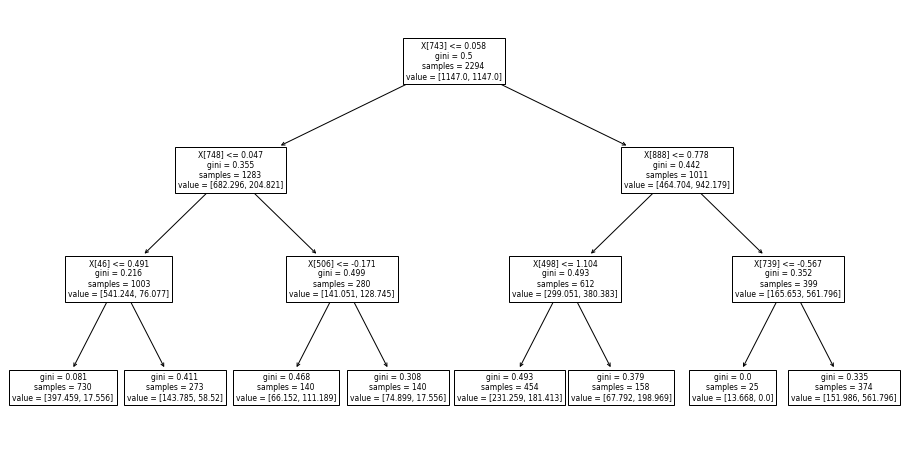

In [86]:
plot_tree(decisiontree_monthly)

5.  Plot coefficient values or feature importance.

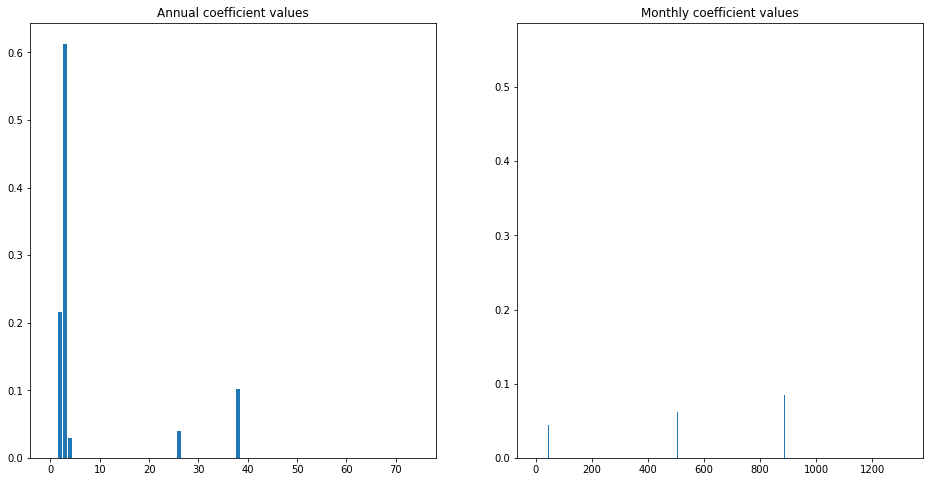

In [87]:
feature_importance_annual = decisiontree_annual.feature_importances_
feature_importance_monthly = decisiontree_monthly.feature_importances_

matplotlib.rcParams['figure.figsize'] = (16, 8)

plt.subplot(121)
plt.bar(range(x_annual.shape[1]), feature_importance_annual)
plt.title("Annual coefficient values")
plt.subplot(122)
plt.bar(range(x_monthly.shape[1]), feature_importance_monthly)
plt.title("Monthly coefficient values")
plt.show()

6.  Plot probability distribution for test set.

In [88]:

y_test_annual_proba = decisiontree_annual.predict_proba(x_test_annual_scaled)
y_test_monthly_proba = decisiontree_monthly.predict_proba(x_test_monthly_scaled)
print(y_test_annual_proba)
print(y_test_monthly_proba)


[[0.9791223  0.0208777 ]
 [0.58012598 0.41987402]
 [0.25046719 0.74953281]
 ...
 [0.62708852 0.37291148]
 [0.79072551 0.20927449]
 [0.25046719 0.74953281]]
[[0.95769763 0.04230237]
 [0.56039366 0.43960634]
 [0.56039366 0.43960634]
 ...
 [0.56039366 0.43960634]
 [0.71073241 0.28926759]
 [0.21293025 0.78706975]]


Text(-2.575000000000003, 0.5, 'Counts of clients')

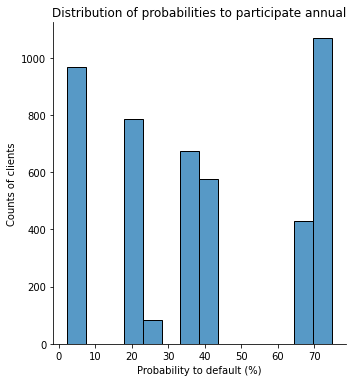

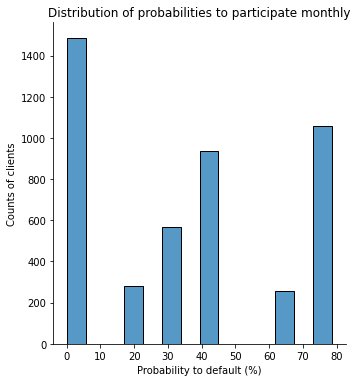

In [89]:
sns.displot(data = y_test_annual_proba[:,1], x = 100*(y_test_annual_proba[:,1]+0.000001))
plt.title('Distribution of probabilities to participate annual')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

sns.displot(data = y_test_monthly_proba[:,1], x = 100*(y_test_monthly_proba[:,1]+0.000001))
plt.title('Distribution of probabilities to participate monthly')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

7.  Plot confusion matrix and ROC curves of train/test set.  Calculate precision/recall.

In [90]:
y_test_annual_predicted = decisiontree_annual.predict(x_test_annual_scaled)
y_test_monthly_predicted = decisiontree_monthly.predict(x_test_monthly_scaled)
cm_annual = confusion_matrix(y_test_annual.values, y_test_annual_predicted)
cm_monthly = confusion_matrix(y_test_monthly.values, y_test_monthly_predicted)
print(cm_annual,cm_monthly)

[[2934 1205]
 [ 154  297]] [[3079 1060]
 [ 196  255]]


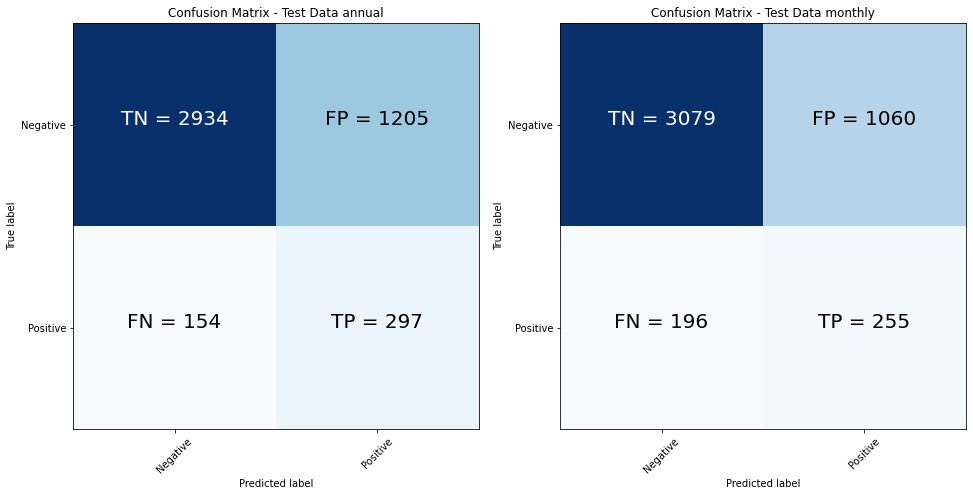

In [91]:
plt.clf()
plt.subplot(121)
plt.imshow(cm_annual, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data annual')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_annual.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_annual[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_annual[i, j] > thresh else "black")
plt.subplot(122)
plt.imshow(cm_monthly, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data monthly')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_monthly.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_monthly[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_monthly[i, j] > thresh else "black")
plt.show()

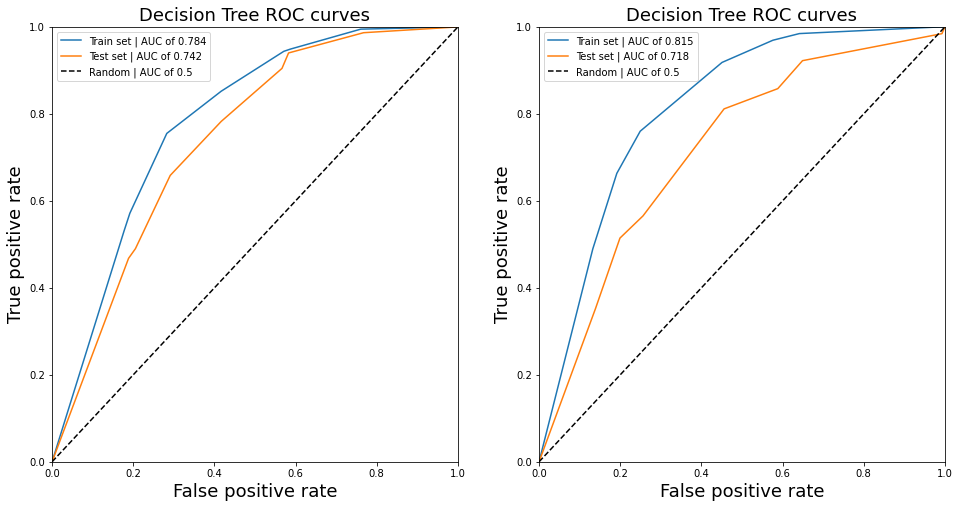

In [92]:
y_train_annual_proba = decisiontree_annual.predict_proba(x_train_annual_scaled)
y_train_monthly_proba = decisiontree_monthly.predict_proba(x_train_monthly_scaled)
fpr_train_annual, tpr_train_annual, _ = roc_curve(y_train_annual, y_train_annual_proba[:, 1])
fpr_test_annual, tpr_test_annual, _ = roc_curve(y_test_annual, y_test_annual_proba[:, 1])
fpr_train_monthly, tpr_train_monthly, _ = roc_curve(y_train_monthly, y_train_monthly_proba[:, 1])
fpr_test_monthly, tpr_test_monthly, _ = roc_curve(y_test_monthly, y_test_monthly_proba[:, 1])
auc_train_annual = auc(fpr_train_annual, tpr_train_annual)
auc_test_annual = auc(fpr_test_annual, tpr_test_annual)
auc_train_monthly = auc(fpr_train_monthly, tpr_train_monthly)
auc_test_monthly  = auc(fpr_test_monthly, tpr_test_monthly)
plt.subplot(121)
plt.plot(fpr_train_annual, tpr_train_annual, label='Train set | AUC of {:4.3f}'.format(auc_train_annual));
plt.plot(fpr_test_annual, tpr_test_annual, label='Test set | AUC of {:4.3f}'.format(auc_test_annual));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.subplot(122)
plt.plot(fpr_train_monthly, tpr_train_monthly, label='Train set | AUC of {:4.3f}'.format(auc_train_monthly));
plt.plot(fpr_test_monthly, tpr_test_monthly, label='Test set | AUC of {:4.3f}'.format(auc_test_monthly));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()

In [93]:
print(classification_report(y_test_annual, y_test_annual_predicted, target_names = ['responed negative', 'responed positive']))

                   precision    recall  f1-score   support

responed negative       0.95      0.71      0.81      4139
responed positive       0.20      0.66      0.30       451

         accuracy                           0.70      4590
        macro avg       0.57      0.68      0.56      4590
     weighted avg       0.88      0.70      0.76      4590



In [94]:
print(classification_report(y_test_monthly, y_test_monthly_predicted, target_names = ['responed negative', 'responed positive']))

                   precision    recall  f1-score   support

responed negative       0.94      0.74      0.83      4139
responed positive       0.19      0.57      0.29       451

         accuracy                           0.73      4590
        macro avg       0.57      0.65      0.56      4590
     weighted avg       0.87      0.73      0.78      4590



8.  Plot decision boundary for top 2 features.

In [95]:
top_feature_annual = pd.DataFrame(feature_importance_annual.reshape((75,)))
print(top_feature_annual.sort_values(by=0))
top_feature_monthly = pd.DataFrame(feature_importance_monthly.reshape((1316,)))
print(top_feature_monthly.sort_values(by=0))

           0
0   0.000000
53  0.000000
52  0.000000
51  0.000000
50  0.000000
..       ...
4   0.030034
26  0.039392
38  0.101356
2   0.216220
3   0.612999

[75 rows x 1 columns]
            0
0    0.000000
881  0.000000
880  0.000000
879  0.000000
878  0.000000
..        ...
506  0.061907
498  0.081034
888  0.084531
748  0.125418
743  0.558583

[1316 rows x 1 columns]


In [96]:
print(x_train_annual.columns[2],x_train_annual.columns[3])
print(x_train_monthly.columns[748],x_train_monthly.columns[743])

sum_2013 sum_2014
('amt_sum_12M', Timestamp('2014-12-31 00:00:00')) ('amt_sum_12M', Timestamp('2014-07-31 00:00:00'))


In [ ]:
print(x_train_annual_scaled.max(axis=0)[2])
print(x_train_annual_scaled.max(axis=0)[3])
print(x_train_annual_scaled.min(axis=0)[2])
print(x_train_annual_scaled.min(axis=0)[3])
print(x_train_monthly_scaled.max(axis=0)[748])
print(x_train_monthly_scaled.max(axis=0)[743])
print(x_train_monthly_scaled.min(axis=0)[748])
print(x_train_monthly_scaled.min(axis=0)[743])

5.53912436943854
3.824668181429266
-1.6977424959358869
-1.755266718463368
3.8355200084088086
4.430666404520765
-1.7596660897424585
-1.7203220533869192


In [ ]:
xx_annual, yy_annual = np.mgrid[-2:6:0.888, -2:4:0.665]
grid_annual = np.c_[xx_annual.ravel(), yy_annual.ravel()]
grid_annual.shape

(100, 2)

In [ ]:
median_inputs_annual = np.ones((100, 75)) * np.median(x_train_annual_scaled, axis=0) 
median_inputs_annual[:,2] = grid_annual[:,0]
median_inputs_annual[:,3] = grid_annual[:,1]
median_inputs_annual

array([[-0.15111187, -0.11240528, -2.        , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -2.        , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -2.        , ..., -0.37462899,
        -0.38350696, -0.37195027],
       ...,
       [-0.15111187, -0.11240528,  5.992     , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528,  5.992     , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528,  5.992     , ..., -0.37462899,
        -0.38350696, -0.37195027]])

In [ ]:
probs_annual = decisiontree_annual.predict_proba(median_inputs_annual)[:, 1].reshape(xx_annual.shape)
np.sum(decisiontree_annual.predict(median_inputs_annual))


42.0

[(-2.0, 4.0),
 Text(0, 0.5, 'sum_2014 scaled'),
 (-2.0, 6.0),
 Text(0.5, 0, 'sum_2013 scaled'),
 None]

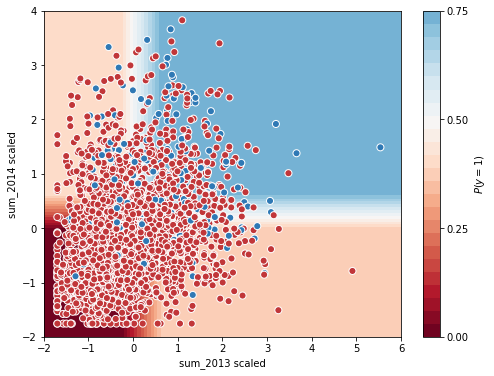

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx_annual, yy_annual, probs_annual, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(x_train_annual_scaled[:,2], x_train_annual_scaled[:, 3], c=y_train_annual, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 6), ylim=(-2, 4),
       xlabel="sum_2013 scaled", ylabel="sum_2014 scaled")

In [ ]:
xx_monthly, yy_monthly = np.mgrid[-2:4:0.666, -2:5:0.777]
grid_monthly = np.c_[xx_monthly.ravel(), yy_monthly.ravel()]
grid_monthly.shape

(100, 2)

In [ ]:
median_inputs_monthly = np.ones((100, 1316)) * np.median(x_train_monthly_scaled, axis=0) 
median_inputs_monthly[:,748] = grid_monthly[:,0]
median_inputs_monthly[:,743] = grid_monthly[:,1]


In [ ]:
probs_monthly = decisiontree_monthly.predict_proba(median_inputs_monthly)[:, 1].reshape(xx_monthly.shape)
decisiontree_monthly.predict(median_inputs_monthly)
decisiontree_monthly.predict_proba(median_inputs_monthly)[:, 1]

array([0.04230237, 0.04230237, 0.04230237, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.04230237, 0.04230237, 0.04230237, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.04230237, 0.04230237, 0.04230237, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.04230237, 0.04230237, 0.04230237, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.62697789, 0.62697789, 0.62697789, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.62697789, 0.62697789, 0.62697789, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.62697789, 0.62697789, 0.62697789, 0.43960634, 0.43960634,
       0.43960634, 0.43960634, 0.43960634, 0.43960634, 0.43960634,
       0.62697789, 0.62697789, 0.62697789, 0.43960634, 0.43960

[(-2.0, 5.0),
 Text(0, 0.5, "('amt_mean_12M', Timestamp('2014-06-30 00:00:00')) scaled"),
 (-2.0, 4.0),
 Text(0.5, 0, "('amt_sum_12M', Timestamp('2015-01-31 00:00:00')) scaled"),
 None]

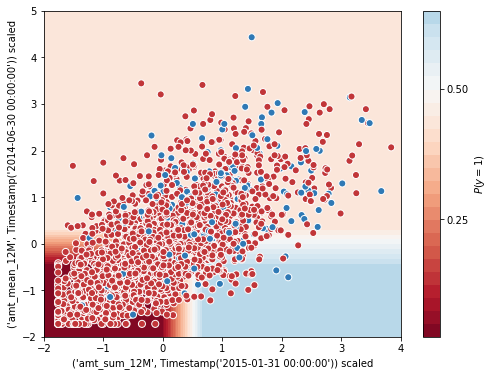

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx_monthly, yy_monthly, probs_monthly, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(x_train_monthly_scaled[:,748], x_train_monthly_scaled[:, 743], c=y_train_monthly, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 4), ylim=(-2, 5),
       xlabel="('amt_sum_12M', Timestamp('2015-01-31 00:00:00')) scaled", ylabel="('amt_mean_12M', Timestamp('2014-06-30 00:00:00')) scaled")

# Random Forests

4.  Fit the training dataset and optimize the hyperparameters of the method.

search for best max_depth for annual features

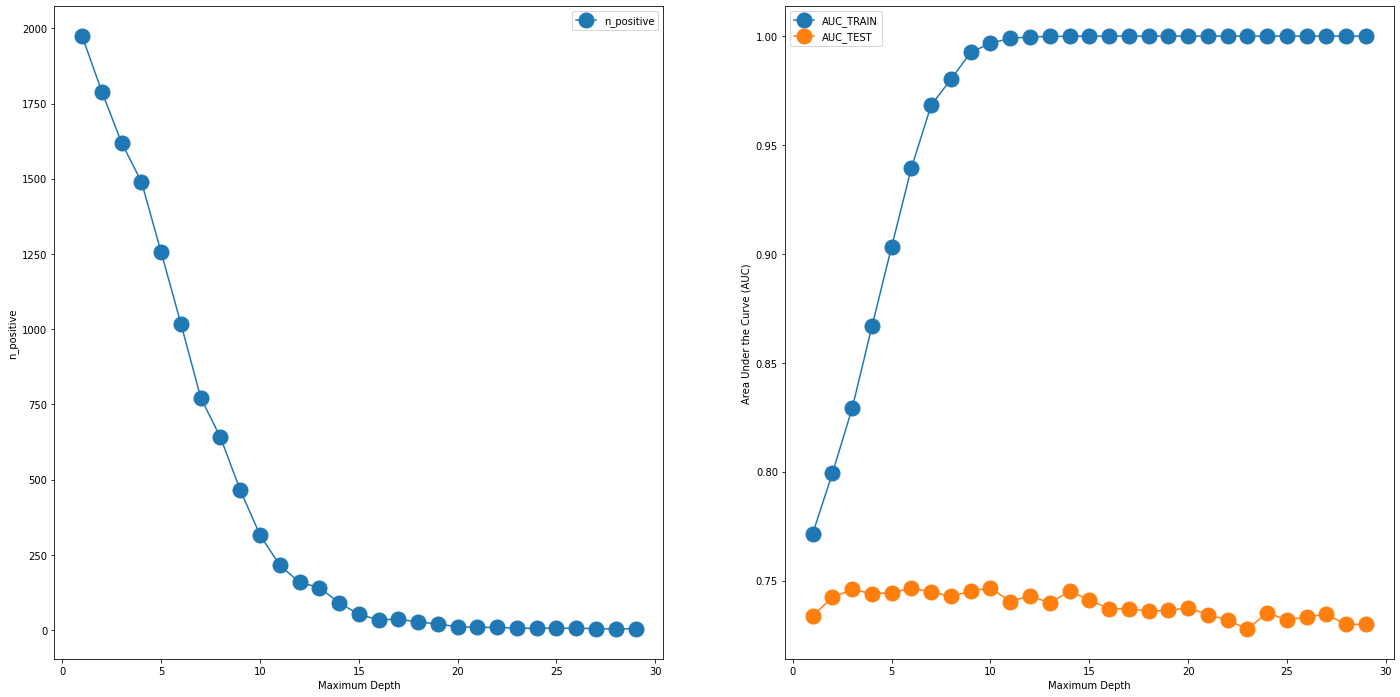

In [235]:
from sklearn.ensemble import RandomForestClassifier
max_depth_range = range(1, 30)
estimator_max_depth = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(RandomForestClassifier(random_state=1, max_depth = i,class_weight="balanced",oob_score=True))
    estimator_max_depth[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(x_test_annual_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_depth[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

search for best max_samples for annual features

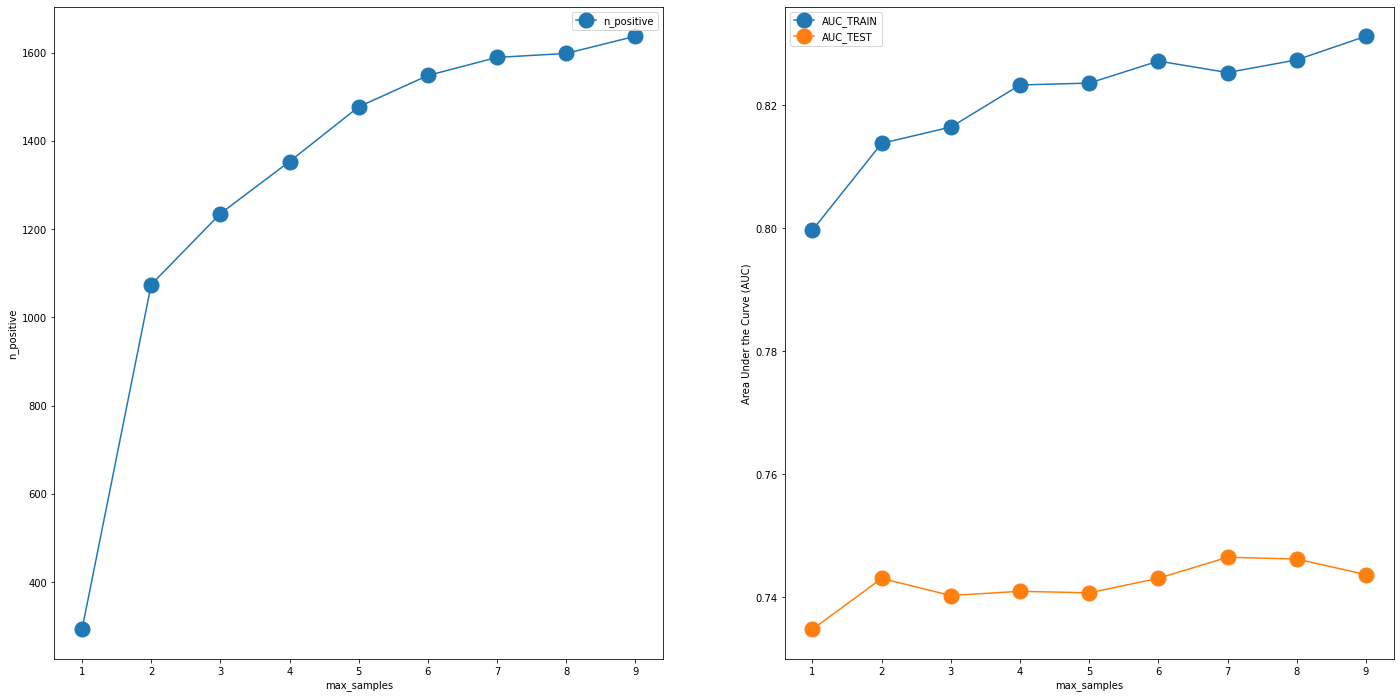

In [249]:
max_samples_range = range(1, 10)
estimator_max_samples = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_samples_range:
    # Define and fit
    estimator_max_samples.append(RandomForestClassifier(random_state=1, max_depth = 3,class_weight="balanced",max_samples=i/10,oob_score=True))
    estimator_max_samples[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_samples[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_samples[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_samples[i-1].predict(x_test_annual_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_samples[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['max_samples'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'max_samples', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("max_samples")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'max_samples', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'max_samples', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("max_samples")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

search best n_estimator for annual features

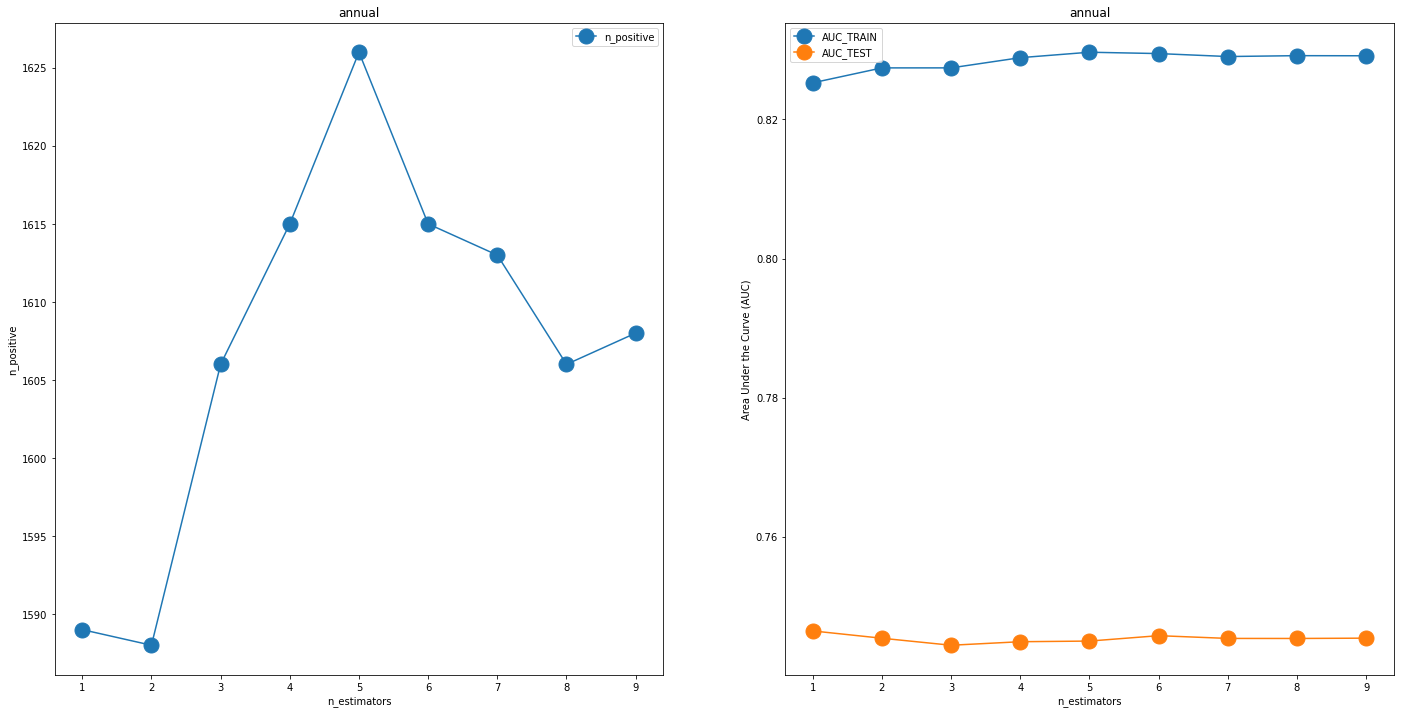

In [250]:
n_estimator_range = range(1, 10)
estimator_n_estimator = []
n_positive = []
auc_train           = []
auc_test            = []

for i in n_estimator_range:
    # Define and fit
    estimator_n_estimator.append(RandomForestClassifier(random_state=1, max_depth = 3,class_weight="balanced",max_samples=0.7,n_estimators=i*100,oob_score=True))
    estimator_n_estimator[i-1].fit(x_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_n_estimator[i-1].predict_proba(x_train_annual_scaled)[:,1] 
    scores_test  = estimator_n_estimator[i-1].predict_proba(x_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_n_estimator[i-1].predict(x_test_annual_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_n_estimator[i-1].predict(x_test_annual_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['n_estimators'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'n_estimators', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("n_estimators")
plt.title("annual")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'n_estimators', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'n_estimators', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("n_estimators")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("annual")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

search for best max_depth for monthly features

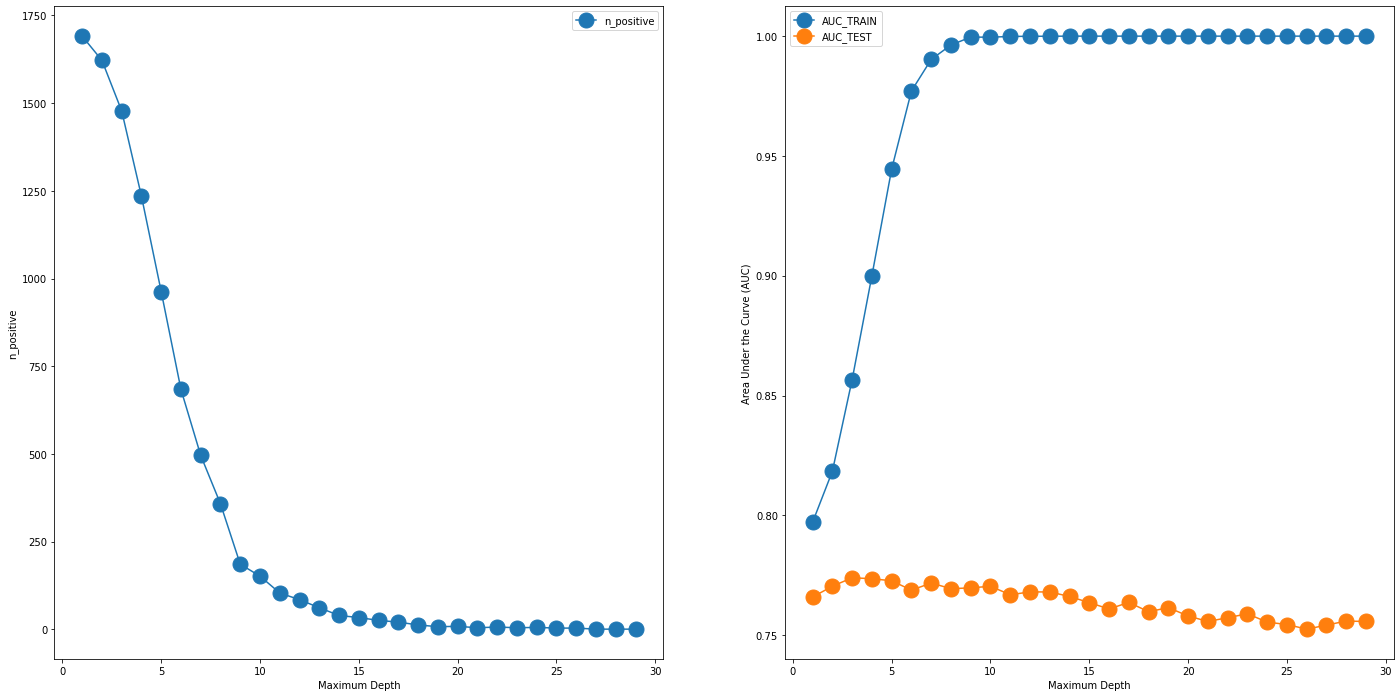

In [238]:
max_depth_range = range(1, 30)
estimator_max_depth = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(RandomForestClassifier(random_state=1, max_depth = i,class_weight="balanced",oob_score=True))
    estimator_max_depth[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(x_test_monthly_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_depth[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

search for best max_samples for monthly features

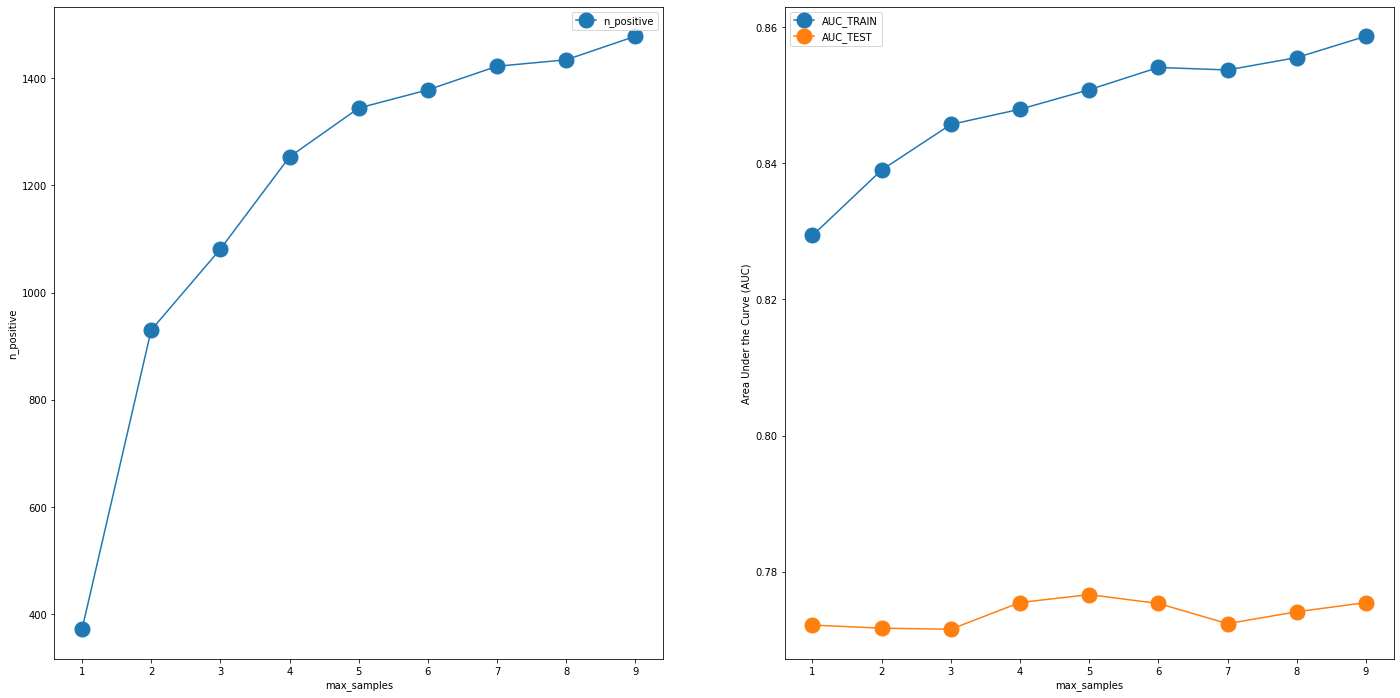

In [111]:
max_samples_range = range(1, 10)
estimator_max_samples = []
n_positive = []
auc_train           = []
auc_test            = []

for i in max_samples_range:
    # Define and fit
    estimator_max_samples.append(RandomForestClassifier(random_state=1, max_depth = 3,class_weight="balanced",max_samples=i/10,oob_score=True))
    estimator_max_samples[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_samples[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_samples[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_samples[i-1].predict(x_test_monthly_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_max_samples[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['max_samples'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'max_samples', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("max_samples")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'max_samples', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'max_samples', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("max_samples")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

search for best n_estimators for monthly features

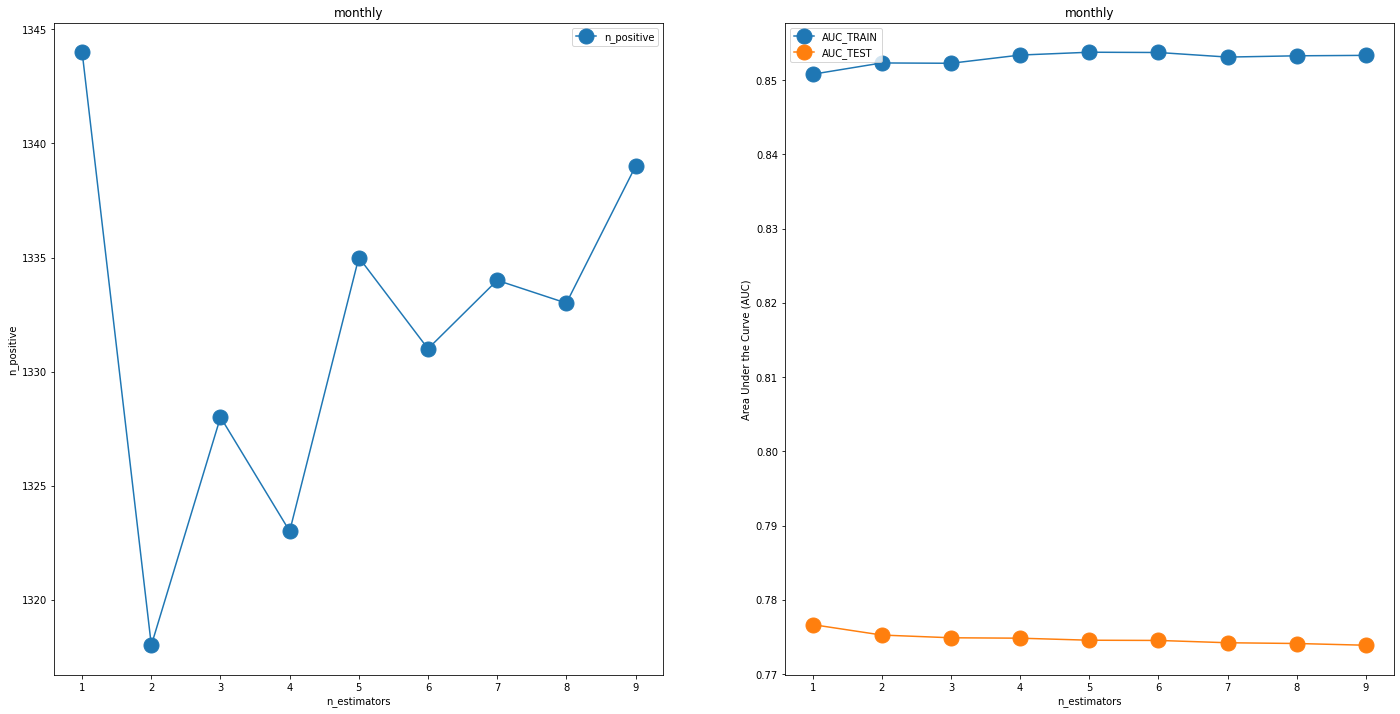

In [240]:
n_estimator_range = range(1, 10)
estimator_n_estimator = []
n_positive = []
auc_train           = []
auc_test            = []

for i in n_estimator_range:
    # Define and fit
    estimator_n_estimator.append(RandomForestClassifier(random_state=1, max_depth = 3,class_weight="balanced",max_samples=0.5,n_estimators=i*100,oob_score=True))
    estimator_n_estimator[i-1].fit(x_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_n_estimator[i-1].predict_proba(x_train_monthly_scaled)[:,1] 
    scores_test  = estimator_n_estimator[i-1].predict_proba(x_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_n_estimator[i-1].predict(x_test_monthly_scaled)
    
    # Calculate accuracy at every iteration and append
    n_positive.append(sum(estimator_n_estimator[i-1].predict(x_test_monthly_scaled)))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))
performance_dictionary = {'n_positive': n_positive, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['n_estimators'] = performance_df.index + 1
performance_df
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'n_estimators', y = 'n_positive', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("n_positive")
ax1.set_xlabel("n_estimators")
plt.title("monthly")
fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'n_estimators', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'n_estimators', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("n_estimators")
ax2.set_ylabel("Area Under the Curve (AUC)")
plt.title("monthly")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show() 

In [272]:
RandomForest_annual = RandomForestClassifier(random_state=1,max_depth=3,class_weight="balanced",max_samples=0.7,oob_score=True)
RandomForest_annual.fit(x_train_annual_scaled, y_train_annual)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [273]:
sum(RandomForest_annual.predict(x_test_annual_scaled))

1589.0

In [274]:
RandomForest_annual.score(x_test_annual_scaled,y_test_annual)

0.689760348583878

In [404]:
RandomForest_monthly = RandomForestClassifier(random_state=1,max_depth=3,class_weight="balanced",max_samples=0.5,oob_score=True)
RandomForest_monthly.fit(x_train_monthly_scaled, y_train_monthly)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [405]:
RandomForest_monthly.score(x_test_monthly_scaled,y_test_monthly)

0.7361655773420479

5.  Plot coefficient values or feature importance.

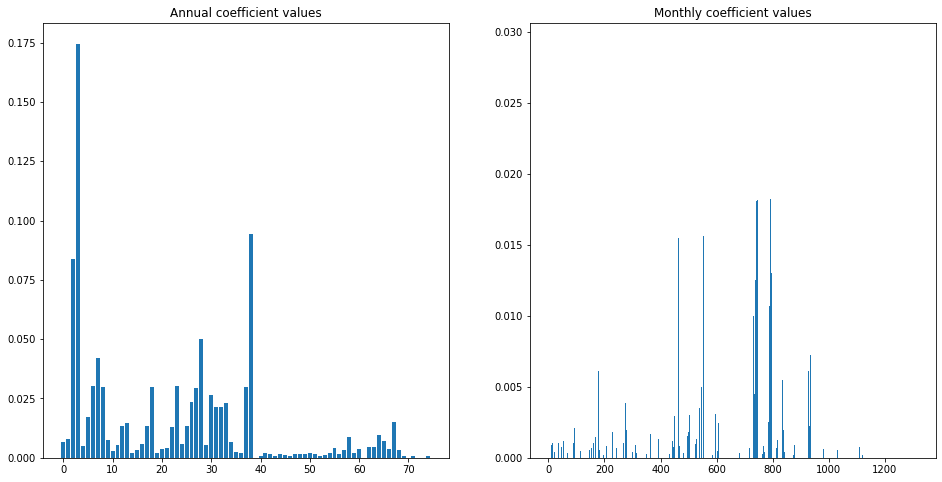

In [406]:
feature_importance_annual = RandomForest_annual.feature_importances_
feature_importance_monthly = RandomForest_monthly.feature_importances_

matplotlib.rcParams['figure.figsize'] = (16, 8)

plt.subplot(121)
plt.bar(range(x_annual.shape[1]), feature_importance_annual)
plt.title("Annual coefficient values")
plt.subplot(122)
plt.bar(range(x_monthly.shape[1]), feature_importance_monthly)
plt.title("Monthly coefficient values")
plt.show()

6.  Plot probability distribution for test set.

In [407]:
y_test_annual_proba = RandomForest_annual.predict_proba(x_test_annual_scaled)
y_test_monthly_proba = RandomForest_monthly.predict_proba(x_test_monthly_scaled)
print(y_test_annual_proba)
print(y_test_monthly_proba)

[[0.85753566 0.14246434]
 [0.46501569 0.53498431]
 [0.42617865 0.57382135]
 ...
 [0.59331579 0.40668421]
 [0.82185581 0.17814419]
 [0.34623358 0.65376642]]
[[0.91655946 0.08344054]
 [0.58954291 0.41045709]
 [0.44435808 0.55564192]
 ...
 [0.76066059 0.23933941]
 [0.9090209  0.0909791 ]
 [0.28374486 0.71625514]]


Text(3.799999999999997, 0.5, 'Counts of clients')

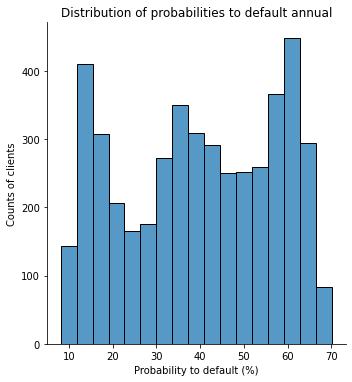

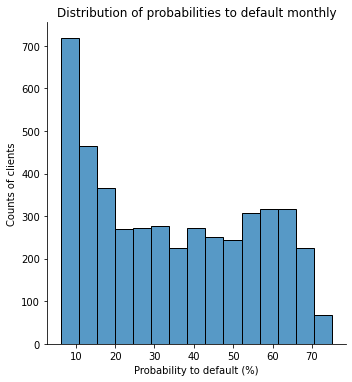

In [408]:
sns.displot(data = y_test_annual_proba[:,1], x = 100*(y_test_annual_proba[:,1]+0.000000001))
plt.title('Distribution of probabilities to default annual')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

sns.displot(data = y_test_monthly_proba[:,1], x = 100*(y_test_monthly_proba[:,1]))
plt.title('Distribution of probabilities to default monthly')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

7.  Plot confusion matrix and ROC curves of train/test set.  Calculate precision/recall.

In [409]:
y_test_annual_predicted = RandomForest_annual.predict(x_test_annual_scaled)
y_test_monthly_predicted = RandomForest_monthly.predict(x_test_monthly_scaled)
cm_annual = confusion_matrix(y_test_annual.values, y_test_annual_predicted)
cm_monthly = confusion_matrix(y_test_monthly.values, y_test_monthly_predicted)
print(cm_annual,cm_monthly)

[[2858 1281]
 [ 143  308]] [[3087 1052]
 [ 159  292]]


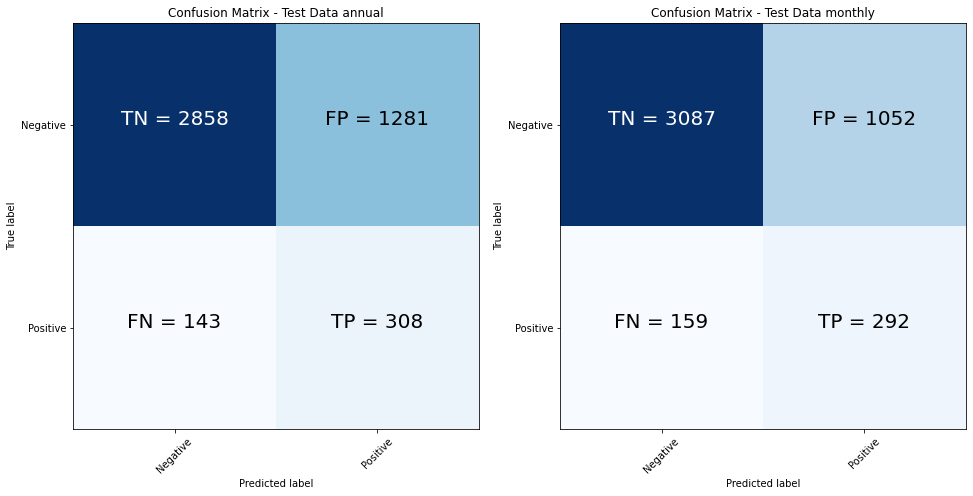

In [410]:
plt.clf()
plt.subplot(121)
plt.imshow(cm_annual, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data annual')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_annual.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_annual[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_annual[i, j] > thresh else "black")
plt.subplot(122)
plt.imshow(cm_monthly, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data monthly')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_monthly.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_monthly[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_monthly[i, j] > thresh else "black")
plt.show()

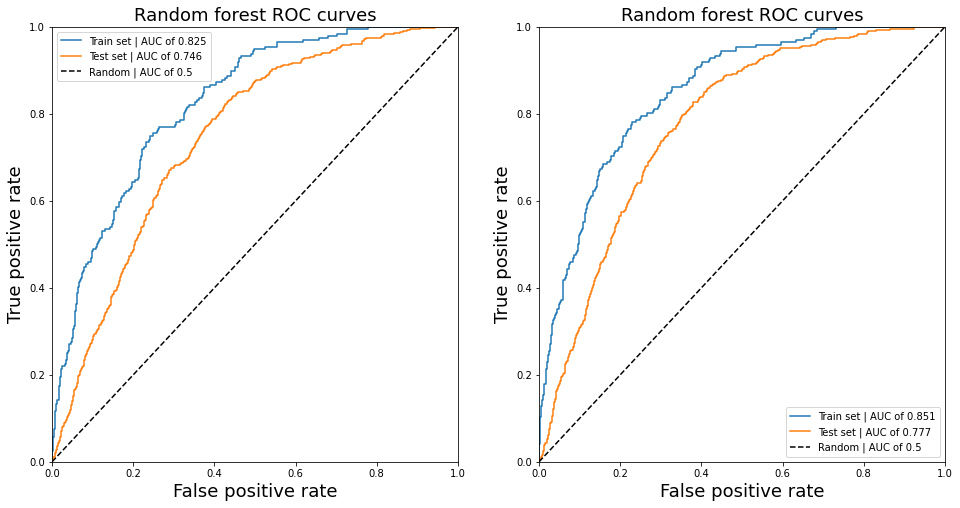

In [414]:
y_train_annual_proba = RandomForest_annual.predict_proba(x_train_annual_scaled)
y_train_monthly_proba = RandomForest_monthly.predict_proba(x_train_monthly_scaled)
fpr_train_annual, tpr_train_annual, _ = roc_curve(y_train_annual, y_train_annual_proba[:, 1])
fpr_test_annual, tpr_test_annual, _ = roc_curve(y_test_annual, y_test_annual_proba[:, 1])
fpr_train_monthly, tpr_train_monthly, _ = roc_curve(y_train_monthly, y_train_monthly_proba[:, 1])
fpr_test_monthly, tpr_test_monthly, _ = roc_curve(y_test_monthly, y_test_monthly_proba[:, 1])
auc_train_annual = auc(fpr_train_annual, tpr_train_annual)
auc_test_annual = auc(fpr_test_annual, tpr_test_annual)
auc_train_monthly = auc(fpr_train_monthly, tpr_train_monthly)
auc_test_monthly  = auc(fpr_test_monthly, tpr_test_monthly)
plt.subplot(121)
plt.plot(fpr_train_annual, tpr_train_annual, label='Train set | AUC of {:4.3f}'.format(auc_train_annual));
plt.plot(fpr_test_annual, tpr_test_annual, label='Test set | AUC of {:4.3f}'.format(auc_test_annual));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.subplot(122)
plt.plot(fpr_train_monthly, tpr_train_monthly, label='Train set | AUC of {:4.3f}'.format(auc_train_monthly));
plt.plot(fpr_test_monthly, tpr_test_monthly, label='Test set | AUC of {:4.3f}'.format(auc_test_monthly));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()

In [412]:
print(classification_report(y_test_annual, y_test_annual_predicted, target_names = ['responed negative', 'responed positive']))

                   precision    recall  f1-score   support

responed negative       0.95      0.69      0.80      4139
responed positive       0.19      0.68      0.30       451

         accuracy                           0.69      4590
        macro avg       0.57      0.69      0.55      4590
     weighted avg       0.88      0.69      0.75      4590



In [413]:
print(classification_report(y_test_monthly, y_test_monthly_predicted, target_names = ['responed negative', 'responed positive']))

                   precision    recall  f1-score   support

responed negative       0.95      0.75      0.84      4139
responed positive       0.22      0.65      0.33       451

         accuracy                           0.74      4590
        macro avg       0.58      0.70      0.58      4590
     weighted avg       0.88      0.74      0.79      4590



8.  Plot decision boundary for top 2 features.

In [415]:
top_feature_annual = pd.DataFrame(feature_importance_annual.reshape((75,)))
print(top_feature_annual.sort_values(by=0))
top_feature_monthly = pd.DataFrame(feature_importance_monthly.reshape((1316,)))
print(top_feature_monthly.sort_values(by=0))

           0
72  0.000000
70  0.000000
39  0.000000
73  0.000000
61  0.000000
..       ...
7   0.042098
28  0.050159
2   0.083676
38  0.094474
3   0.174546

[75 rows x 1 columns]
            0
0    0.000000
860  0.000000
861  0.000000
862  0.000000
864  0.000000
..        ...
792  0.018235
791  0.018280
744  0.022561
749  0.023047
743  0.029188

[1316 rows x 1 columns]


In [417]:
print(x_train_annual.columns[3],x_train_annual.columns[38])
print(x_train_monthly.columns[749],x_train_monthly.columns[743])

sum_2014 count_2014
('amt_sum_12M', Timestamp('2015-01-31 00:00:00')) ('amt_sum_12M', Timestamp('2014-07-31 00:00:00'))


In [416]:
print(x_train_annual_scaled.max(axis=0)[3])
print(x_train_annual_scaled.max(axis=0)[38])
print(x_train_annual_scaled.min(axis=0)[3])
print(x_train_annual_scaled.min(axis=0)[38])
print(x_train_monthly_scaled.max(axis=0)[749])
print(x_train_monthly_scaled.max(axis=0)[743])
print(x_train_monthly_scaled.min(axis=0)[749])
print(x_train_monthly_scaled.min(axis=0)[743])

3.824668181429266
3.6694938887815822
-1.755266718463368
-2.0870367135984464
3.806492137524925
4.430666404520765
-1.745221372812511
-1.7203220533869192


In [375]:
xx_annual, yy_annual = np.mgrid[-2:4:0.666, -3:4:0.777]
grid_annual = np.c_[xx_annual.ravel(), yy_annual.ravel()]
grid_annual.shape

(100, 2)

In [289]:
median_inputs_annual = np.ones((100, 75)) * np.median(x_train_annual_scaled, axis=0) 
median_inputs_annual[:,3] = grid_annual[:,0]
median_inputs_annual[:,38] = grid_annual[:,1]
median_inputs_annual

array([[-0.15111187, -0.11240528, -0.1179405 , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -0.1179405 , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -0.1179405 , ..., -0.37462899,
        -0.38350696, -0.37195027],
       ...,
       [-0.15111187, -0.11240528, -0.1179405 , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -0.1179405 , ..., -0.37462899,
        -0.38350696, -0.37195027],
       [-0.15111187, -0.11240528, -0.1179405 , ..., -0.37462899,
        -0.38350696, -0.37195027]])

In [383]:
probs_annual = RandomForest_annual.predict_proba(median_inputs_annual)[:, 1].reshape(xx_annual.shape)
np.sum(RandomForest_annual.predict(median_inputs_annual))

60.0

[(-3.0, 4.0),
 Text(0, 0.5, 'count_2014 scaled'),
 (-2.0, 4.0),
 Text(0.5, 0, 'sum_2014 scaled'),
 None]

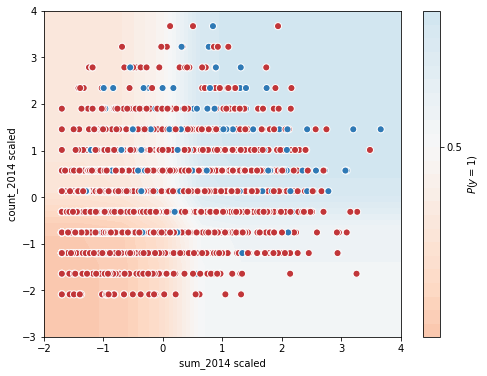

In [291]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx_annual, yy_annual, probs_annual, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(x_train_annual_scaled[:,2], x_train_annual_scaled[:, 38], c=y_train_annual, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 4), ylim=(-3, 4),
       xlabel="sum_2014 scaled", ylabel="count_2014 scaled")

In [418]:
xx_monthly, yy_monthly = np.mgrid[-2:4:0.666, -2:5:0.777]
grid_monthly = np.c_[xx_monthly.ravel(), yy_monthly.ravel()]
grid_monthly.shape

(100, 2)

In [419]:
median_inputs_monthly = np.ones((100, 1316)) * np.median(x_train_monthly_scaled, axis=0) 
median_inputs_monthly[:,749] = grid_monthly[:,0]
median_inputs_monthly[:,743] = grid_monthly[:,1]
median_inputs_monthly

array([[-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       ...,
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119],
       [-0.3963306 , -0.68694373, -0.40051676, ..., -0.27482409,
        -0.22792544, -0.17345119]])

In [387]:
probs_monthly = RandomForest_monthly.predict_proba(median_inputs_monthly)[:, 1].reshape(xx_monthly.shape)
RandomForest_monthly.predict_proba(median_inputs_monthly)

array([[0.75584805, 0.24415195],
       [0.75584805, 0.24415195],
       [0.75584805, 0.24415195],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.75584805, 0.24415195],
       [0.75584805, 0.24415195],
       [0.75584805, 0.24415195],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.75584805, 0.24415195],
       [0.75584805, 0.24415195],
       [0.75584805, 0.24415195],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.72767496, 0.27232504],
       [0.

Here we can see that all modified grid points have a probility of less than 0.5 to be positive. Therefore, decision boundary cannot be show in the selected region.

The hypothesis is that since there were too much features (1317) and even the top 2 feature had very low feature importance (around 0.03). Each estimator extract highly diverse features to build the tree. Therefore, the predicted probility of medium features point from ensemble model would not fluctuate much with modification of single features in a reasonable region.

below we build a simple trial.

In [379]:
a=[]
for n in range(1316):
  median_inputs_monthly = np.ones((100, 1316)) * np.median(x_train_monthly_scaled, axis=0) 
  median_inputs_monthly[:,n] = np.arange(-50,50)
  a.append(sum(RandomForest_monthly.predict(median_inputs_monthly)))

In [380]:
sum(np.array(a))

0.0

we can see from the trial that by modifying features one for each time from -50 to 50, which is a sufficiently large range, all modified dataset predict no positive output.

[(-2.0, 5.0),
 Text(0, 0.5, "('amt_sum_12M', Timestamp('2014-07-31 00:00:00')) scaled"),
 (-2.0, 4.0),
 Text(0.5, 0, "('amt_sum_12M', Timestamp('2014-10-31 00:00:00')) scaled"),
 None]

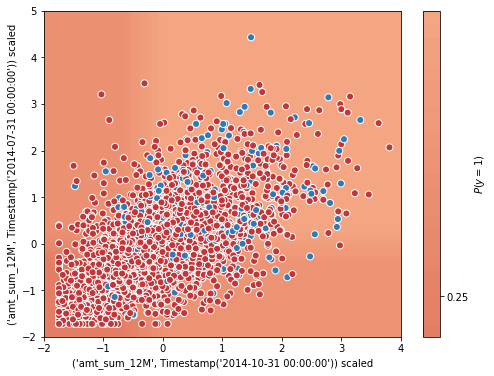

In [420]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx_monthly, yy_monthly, probs_monthly, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(x_train_monthly_scaled[:,749], x_train_monthly_scaled[:, 743], c=y_train_monthly, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 4), ylim=(-2, 5),
       xlabel="('amt_sum_12M', Timestamp('2014-10-31 00:00:00')) scaled", ylabel="('amt_sum_12M', Timestamp('2014-07-31 00:00:00')) scaled")

# 1.3  Comparison of methods 

| | LG annual  | LG monthly  | DT annual | DT monthly | RF annual | RF monthly |
| --- | --- | --- | --- | --- | --- | --- |
| **# True Positive**  | 311  | 320 | 297 | 255 | 308 | 315 |
| **Recall**  | 0.69 | 0.71 | 0.66 | 0.57 | 0.68 | 0.65 |
| **Precision** | 0.21 | 0.21 | 0.20 | 0.19 | 0.19 | 0.22 |
| **AUC** | 0.773 | 0.771 | 0.742 | 0.718 | 0.746 | 0.777 |
| **Top 2 Feature Importance** | (0.54, 0.46) | (0.51, 0.55) | (0.61, 0.22) | (0.56, 0.13) | (0.09, 0.17) | (0.02, 0.02) |

# Comments

A problem arose during training and evaluation. For all 6 combination, since the datasets were highly unbalanced (approximately 1:9 for P/N), therefore if the class_weight were not set to "balanced", very few positive prediction would be made, which means the tuned criteria or hypersurfaces from training were very strict or biased for positive prediction, and the high accuracy just took the advantage of the fact that negative samples take a dominated portion of the datasets.

Another observation during hyperparameter tuning is that there is a trade-off between recall and accuracy. By improving recall to maximize the TP, there would be a drop on the accuracy. Therefore, since the ultimate purpose of this analysis is to predict the potential customers who are willing to pay for the campaign, the models were built based on higher AUC and recall with some sacrifices on the accuracy (set class_weight to "balanced")

Based on the results, logistic regression with annual features, logistuc regression with monthly features, and random forest with monthly features have a close proformance regarding AUC. However, considering the recall (random forest models showed a lower recall) and potential overfitting problem of higher #dof (due to the huge feature dimension) than the ideal #dof to model the phenomenon that may show on testing new data, logistic regression with annual feature would be the preferred model.